# Στοιχεία ομάδας

**Αριθμός ομάδας**: 22

**Πρώτο μέλος**:  
Ονοματεπώνυμο: Ψαρουδάκης Ανδρέας <br>
Αριθμός μητρώου: 03116001 <br>
Email:  andreaspsaroudakis@gmail.com <br>

**Δεύτερο μέλος**: <br>
Ονοματεπώνυμο: Τζε Χριστίνα-Ουρανία <br>
Αριθμός μητρώου: 03116079 <br>
Email: xristina.rania.tze@gmail.com

# Εισαγωγή

Σκοπός της παρούσας εργαστηριακής άσκησης είναι η βελτιστοποίηση της απόδοσης μοντέλων Βαθιάς Μάθησης στο σύνολο δεδομένων CIFAR-100 με χρήση της βιβλιοθήκης TensorFlow 2. Τα μοντέλα που βελτιστοποιούμε είναι τόσο from scratch όσο και δίκτυα μεταφοράς μάθησης (Trasnfer learning). Ξεκινάμε, εξετάζοντας τα μοντέλα πάνω σε ένα υποσύνολο 20 κλάσεων ενώ στη συνέχεια αυξάνουμε τον αριθμό τους σταδιακά μέχρι τις 80. Μελετάμε επίσης ξεχωριστά την επίδραση του batch size αλλά και του optimizer στην επίδοση των βελτιστοποιημένων μοντέλων μας ενώ σημειώνουμε και τους χρόνους εκπαίδευση για το πρόβλημα των 80 κλάσεων.

# Βαθιά μάθηση στο CIFAR-100

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2

import time
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με ένα μοναδικό ξεχωριστό υποσύνολο του CIFAR-100.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό της ομάδας σας.

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 22

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number()

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
print(our_index)
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

[1, 6, 9, 19, 25, 26, 27, 29, 32, 33, 39, 42, 53, 68, 79, 86, 87, 88, 91, 98]


In [ ]:
# print our classes
print(our_classes)

[' aquarium_fish', ' bee', ' bottle', ' cattle', ' couch', ' crab', ' crocodile', ' dinosaur', ' flatfish', ' forest', ' keyboard', ' leopard', ' orange', ' road', ' spider', ' telephone', ' television', ' tiger', ' trout', ' woman']


In [ ]:
CLASSES_NUM=len(our_classes)
print(CLASSES_NUM)

20


1500
Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


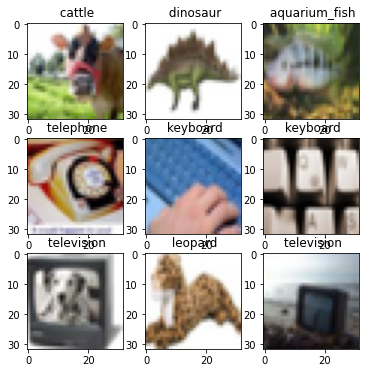

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Μετασχηματισμός των labels

Επειδή ο αριθμός των κλάσεων με τις οποίες δουλεύουμε (20,40,60 ή 80) είναι διαφορετικός του αριθμού των κλάσεων του Cifar (100) μετασχηματίζουμε αρχικά τα labels της ομάδας μας σε νέες τιμές εντός του διαστήματος [0,num_of_classes). Για τον σκοπό αυτό ορίζουμε τις συναρτήσεις **create_dict** και **create_new_labels**. Η πρώτη δέχεται σαν όρισμα μία ταξινομημένη λίστα, old_labels, η οποία περιέχει τα labels όπως αυτά προκύπτουν με βάση τον κωδικό της ομάδας μας, και επιστρέφει ένα λεξικό με τις αντιστοιχίσεις των νέων labels σε νέα από 0 μέχρι num_of_classes - 1. Η δεύτερη δημιουργεί και επιστρέφει έναν πίνακα διαστάσεων όσο ο αρχικός πίνακας y_train ο οποίος περιέχει το νέο label όλων των εικόνων με βάση την αντιστοίχιση που ορίζει το λεξικό της create_dict. 

In [ ]:
def create_dict(old_labels):
  d = dict()
  counter = 0
  for i in range(len(old_labels)):
    d[old_labels[i]] = counter
    counter = counter + 1
  return d

In [ ]:
def create_new_labels(old_labels,y_train):
  d = create_dict(old_labels)
  new_labels = np.zeros((y_train.shape[0],y_train.shape[1])).astype(np.uint8)
  for i in range(y_train.shape[0]): # For every image replace the old label with the new one
    new_labels[i] = d[y_train[i][0]]
  return new_labels

In [ ]:
y_train = create_new_labels(our_index,y_train)
y_val = create_new_labels(our_index,y_val)
y_test = create_new_labels(our_index,y_test)

## Συναρτήσεις εκπαίδευσης

Θα χρησιμοποιήσουμε την ιδιότητα data prefetch του tf2:

In [ ]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 32
IMG_SIZE = 224
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

def resize_transform(image,label):
  return tf.image.resize(image, (IMG_SIZE, IMG_SIZE)),label

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

train_ds_res = train_ds.map(resize_transform)
validation_ds_res = validation_ds.map(resize_transform)
test_ds_res = test_ds.map(resize_transform)

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, train_dataset = train_ds, validation_dataset = validation_ds, epochs = 100, callbacks = None, steps_per_epoch = int(np.ceil(x_train.shape[0]/BATCH_SIZE)), validation_steps = int(np.ceil(x_val.shape[0]/BATCH_SIZE))):
  history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_dataset, validation_steps=validation_steps, callbacks=callbacks)
  return(history)

## Γραφικές παραστάσεις εκπαίδευσης και απόδοση στο σύνολο ελέγχου

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
      plt.figure(figsize=(8, 8))
      plt.suptitle('Training Curves')
      # plot loss
      plt.subplot(211)
      plt.title('Cross Entropy Loss')
      plt.plot(history.history['loss'], color='blue', label='train')
      plt.plot(history.history['val_loss'], color='orange', label='val')
      plt.legend(loc='upper right')
      # plot accuracy
      plt.subplot(212)
      plt.title('Classification Accuracy')
      plt.plot(history.history['accuracy'], color='blue', label='train')
      plt.plot(history.history['val_accuracy'], color='orange', label='val')
      plt.legend(loc='lower right')
      return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_dataset, evaluation_steps):
      print('\n\033[1mTest set evaluation metrics\033[0m')
      print('---------------------------')
      loss0, accuracy0 = model.evaluate(evaluation_dataset, steps = evaluation_steps,verbose=0)
      print("\033[1mLoss:     {:.3f}".format(loss0))
      print("\033[1mAccuracy: {:.3f}%".format(accuracy0*100))
      return (loss0, accuracy0)

def model_report(model, history, evaluation_dataset = test_ds, evaluation_steps = int(np.ceil(x_test.shape[0]/BATCH_SIZE))):
      plt = summarize_diagnostics(history)
      plt.show()
      return model_evaluation(model, evaluation_dataset, evaluation_steps)

## **Μοντέλα δικτύων**

Ξεκινάμε ορίζοντας κάποια μοντέλα "from scratch" και εξετάζουμε την επίδοση τους στο πρόβλημα κατηγοριοποίησης των 20 κλάσεων.

### Δίκτυα "from scratch"

Ορίζουμε δύο λεξικά, losses και accuracies, τα οποία έχουν για κλειδιά τα ονόματα των μοντέλων που εξετάζουμε και για τιμές τα losses και accuracies αντίστοιχα.

In [ ]:
losses = {}
accuracies = {}

#### Simple CNN

Το μοντέλο Simple CNN που ορίζουμε διαθέτει **3 συνελικτικά (convolutional) επίπεδα**, εκ των οποίων το πρώτο είναι 32 φίλτρων διάστασης 3x3, το δεύτερο είναι 64 φίλτρων 3x3 και το τρίτο είναι 64 φίλτρων 3x3. Και τα τρία ενεργοποιούνται μέσω συναρτήσεων **ReLU**. Μετά από τα δύο πρώτα Convolutional layers, υπάρχει ένα επίπεδο υποδειγματοληψίας τύπου **MaxPooling 2x2** για τη μείωση της διάστασης των εικόνων με παράλληλη διατήρηση της χρήσιμης πληροφορίας. Στο τέλος βρίσκονται **2 Fully Connected επίπεδα**, από τα οποία το πρώτο περιλαμβάνει 64 νευρώνες και το δεύτερο και τελευταίο (output layer) περιλαμβάνει πλήθος νευρώνων ίσο με τον αριθμό των εκάστοτε κλάσεων που ορίζουμε. Για το προτελευταίο layer επιλέγουμε ως συνάρτηση ενεργοποίησης μια ReLU ενώ το output layer διαθέτει μια συνάρτηση ενεργοποίησης (activation fucntion) **softmax** για την κανονικοποίηση των τιμών στο εύρος [0,1] (πιθανότητες).

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(CLASSES_NUM, activation='softmax'))
  model.compile(optimizer=optimizer(learning_rate=lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

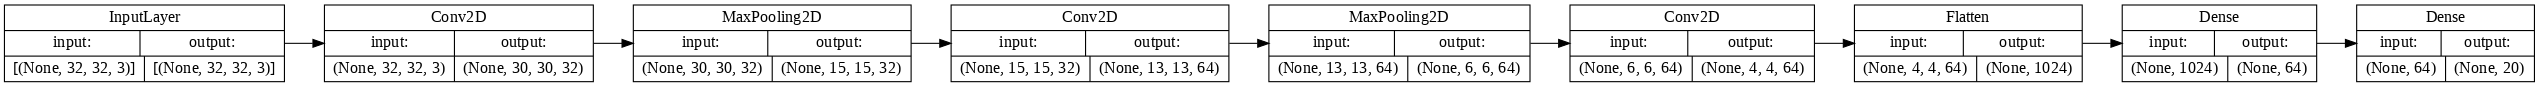

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
tf.keras.utils.plot_model(SIMPLE_MODEL, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=80)

In [ ]:
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL)

Epoch 1/100
266/266 [==============================] - 3s 5ms/step - loss: 2.9499 - accuracy: 0.0951 - val_loss: 2.7037 - val_accuracy: 0.1862
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 2.6786 - accuracy: 0.1851 - val_loss: 2.5047 - val_accuracy: 0.2334
Epoch 3/100
266/266 [==============================] - 1s 4ms/step - loss: 2.4985 - accuracy: 0.2490 - val_loss: 2.3568 - val_accuracy: 0.2992
Epoch 4/100
266/266 [==============================] - 1s 4ms/step - loss: 2.3540 - accuracy: 0.2950 - val_loss: 2.2667 - val_accuracy: 0.3211
Epoch 5/100
266/266 [==============================] - 1s 4ms/step - loss: 2.2671 - accuracy: 0.3207 - val_loss: 2.1998 - val_accuracy: 0.3211
Epoch 6/100
266/266 [==============================] - 1s 4ms/step - loss: 2.1668 - accuracy: 0.3464 - val_loss: 2.1467 - val_accuracy: 0.3457
Epoch 7/100
266/266 [==============================] - 1s 4ms/step - loss: 2.1014 - accuracy: 0.3701 - val_loss: 2.1096 - val_accuracy: 0.3717

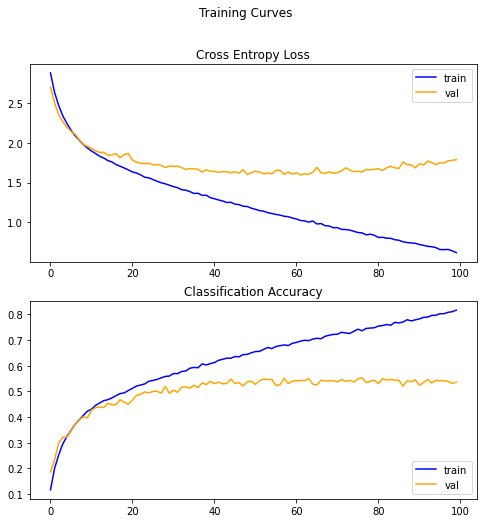


Test set evaluation metrics
---------------------------
Loss:     1.867
Accuracy: 53.770%


In [ ]:
loss, accuracy = model_report(SIMPLE_MODEL, SIMPLE_MODEL_history)
losses["SIMPLE_MODEL"] = loss
accuracies["SIMPLE_MODEL"] = accuracy

#### CNN1

Το μοντέλο CNN1 που ορίζουμε διαθέτει **3 συνελικτικά (convolutional) επίπεδα**, εκ των οποίων το πρώτο είναι 32 φίλτρων διάστασης 3x3, το δεύτερο είναι 64 φίλτρων 3x3 και το τρίτο είναι 128 φίτλρων 3x3. Και τα τρία ενεργοποιούνται μέσω συναρτήσεων **ReLU**. Μετά από τα δύο πρώτα Convolutional layers, υπάρχει ένα επίπεδο υποδειγματοληψίας τύπου **MaxPooling 2x2**, ενώ μετά το τρίτο συνελικτικό επίπεδο βρίσκεται ένα επίπεδο **Average Pooling 2x2**. Στο τέλος βρίσκονται **2 Fully Connected επίπεδα**, από τα οποία το πρώτο περιλαμβάνει 1024 νευρώνες και το δεύτερο και τελευταίο (output layer) περιλαμβάνει πλήθος νευρώνων ίσο με τον αριθμό των εκάστοτε κλάσεων που ορίζουμε. Για το προτελευταίο layer επιλέγουμε ως συνάρτηση ενεργοποίησης μια ReLU ενώ το output layer διαθέτει μια συνάρτηση ενεργοποίησης (activation fucntion) **softmax** για την κανονικοποίηση των τιμών στο εύρος [0,1] (πιθανότητες).

In [ ]:
def init_cnn1_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.AveragePooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024,activation='relu'))
  model.add(layers.Dense(CLASSES_NUM,activation='softmax'))

  model.compile(optimizer=optimizer(learning_rate=lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
average_pooling2d (AveragePo (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

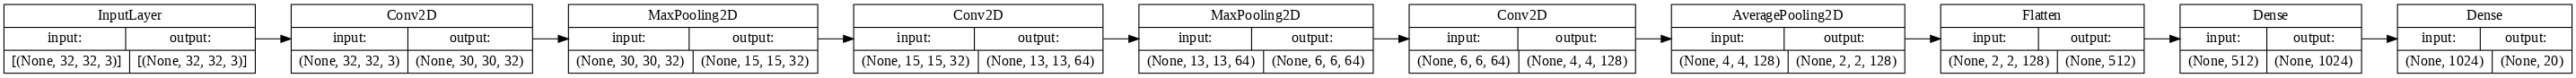

In [ ]:
CNN1_MODEL = init_cnn1_model(summary = True)
tf.keras.utils.plot_model(CNN1_MODEL, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=80)

In [ ]:
CNN1_MODEL_history = train_model(CNN1_MODEL)

Epoch 1/100
266/266 [==============================] - 2s 4ms/step - loss: 2.9156 - accuracy: 0.1059 - val_loss: 2.6142 - val_accuracy: 0.2041
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 2.5928 - accuracy: 0.2177 - val_loss: 2.4248 - val_accuracy: 0.2746
Epoch 3/100
266/266 [==============================] - 1s 4ms/step - loss: 2.4168 - accuracy: 0.2641 - val_loss: 2.2641 - val_accuracy: 0.3039
Epoch 4/100
266/266 [==============================] - 1s 4ms/step - loss: 2.2462 - accuracy: 0.3239 - val_loss: 2.1470 - val_accuracy: 0.3557
Epoch 5/100
266/266 [==============================] - 1s 4ms/step - loss: 2.1190 - accuracy: 0.3605 - val_loss: 2.0958 - val_accuracy: 0.3670
Epoch 6/100
266/266 [==============================] - 1s 4ms/step - loss: 2.0549 - accuracy: 0.3820 - val_loss: 2.0114 - val_accuracy: 0.3949
Epoch 7/100
266/266 [==============================] - 1s 4ms/step - loss: 1.9312 - accuracy: 0.4149 - val_loss: 1.9381 - val_accuracy: 0.4162

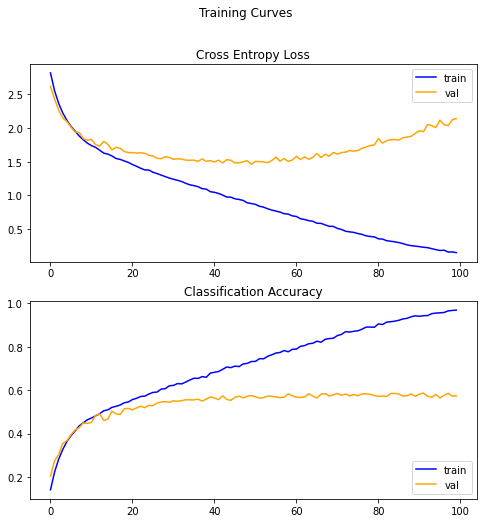


Test set evaluation metrics
---------------------------
Loss:     2.213
Accuracy: 56.548%


In [ ]:
loss, accuracy = model_report(CNN1_MODEL, CNN1_MODEL_history)
losses["CNN1"] = loss
accuracies["CNN1"] = accuracy

#### CNN2

Το μοντέλο CNN2 που ορίζουμε αποτελείται από συνολικά **4 συνελικτικά (convolutional) επίπεδα**, εκ των οποίων το πρώτο είναι 32 φίλτρων διάστασης 3x3, το δεύτερο είναι 64 φίλτρων 3x3, το τρίτο είναι 128 φίτλρων 3x3 και το τέταρτο είναι 256 φίλτρων 3x3. Και τα τέσσερα ενεργοποιούνται μέσω συναρτήσεων **ReLU** ενώ πραγματοποιείται padding στις αρχικές εικόνες, ώστε να διατηρήσουν τις διαστάσεις τους καθώς διέρχονται μέσα από το συνελικτικό επίπεδο. Μετά από τα τρία πρώτα Convolutional layers υπάρχει ένα επίπεδο υποδειγματοληψίας τύπου **MaxPooling 2x2** για μείωση της διαστατικότητας με παράλληλη διατήρηση της χρήσιμης πληροφορίας. Στο τέλος βρίσκονται **3 Fully Connected επίπεδα**, από τα οποία το πρώτο περιλαμβάνει 512 νευρώνες, το δεύτερο 128 ενώ το τρίτο και τελευταίο (output layer) περιλαμβάνει πλήθος νευρώνων ίσο με τον αριθμό των εκάστοτε κλάσεων που ορίζουμε. Για το προτελευταίο layer επιλέγουμε ως συνάρτηση ενεργοποίησης μια ReLU ενώ το output layer διαθέτει μια συνάρτηση ενεργοποίησης (activation fucntion) **softmax** για την κανονικοποίηση των τιμών στο εύρος [0,1] (πιθανότητες).

In [ ]:
def init_cnn2_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(32, 32, 3))) 
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(256, (3, 3), activation='relu',padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dense(CLASSES_NUM,activation='softmax'))

  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 256)        

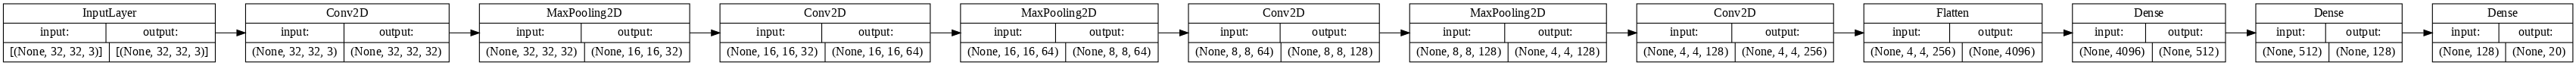

In [ ]:
CNN2_MODEL = init_cnn2_model(summary = True)
tf.keras.utils.plot_model(CNN2_MODEL, to_file='model.png', show_shapes=True, show_layer_names=False,rankdir='LR', expand_nested=False, dpi=80)

In [ ]:
CNN2_MODEL_history = train_model(CNN2_MODEL)

Epoch 1/100
266/266 [==============================] - 2s 5ms/step - loss: 2.8961 - accuracy: 0.1100 - val_loss: 2.4397 - val_accuracy: 0.2480
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 2.3937 - accuracy: 0.2793 - val_loss: 2.2038 - val_accuracy: 0.3298
Epoch 3/100
266/266 [==============================] - 1s 5ms/step - loss: 2.1638 - accuracy: 0.3319 - val_loss: 2.0351 - val_accuracy: 0.3677
Epoch 4/100
266/266 [==============================] - 1s 5ms/step - loss: 1.9969 - accuracy: 0.3915 - val_loss: 1.9372 - val_accuracy: 0.4009
Epoch 5/100
266/266 [==============================] - 1s 5ms/step - loss: 1.8741 - accuracy: 0.4367 - val_loss: 1.8745 - val_accuracy: 0.4315
Epoch 6/100
266/266 [==============================] - 1s 5ms/step - loss: 1.7463 - accuracy: 0.4692 - val_loss: 1.7926 - val_accuracy: 0.4588
Epoch 7/100
266/266 [==============================] - 1s 5ms/step - loss: 1.6397 - accuracy: 0.5079 - val_loss: 1.7361 - val_accuracy: 0.4707

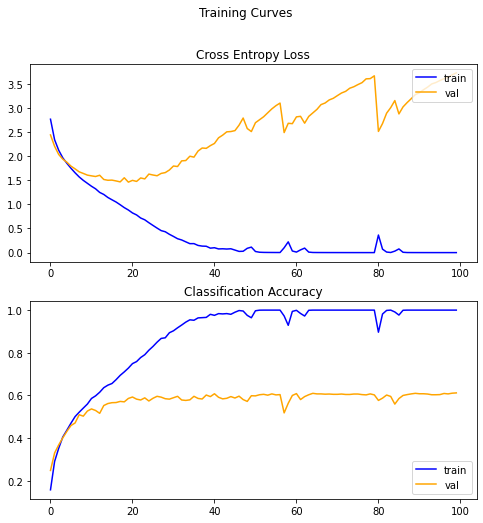


Test set evaluation metrics
---------------------------
Loss:     3.686
Accuracy: 59.276%


In [ ]:
loss, accuracy = model_report(CNN2_MODEL, CNN2_MODEL_history)
losses["CNN2"] = loss
accuracies["CNN2"] = accuracy

### Μεταφορά μάθησης

Προκειμένου να λάβουμε υψηλότερα ποσοστά ορθής κατηγοριοποίησης κάνουμε χρήση μεταφοράς μάθησης. Συγκεκριμένα, αξιοποιούμε τα δίκτυα **VGG16, MobileNet** και **DenseNet**, τα οποία είναι προεκπαιδευμένα πάνω στο **ImageNet**. Για κάθε ένα από αυτά, δοκιμάζουμε να εκπαιδεύσουμε αρχικά μόνο την κεφαλή ταξινόμησης, κρατώντας παγωμένα όλα τα συνελικτικά επίπεδα. Στη συνέχεια, επιχειρούμε να εκπαιδεύσουμε τόσο τον classifier όσο και ορισμένα συνελικτικά επίπεδα που βρίσκονται προς την έξοδο του δικτύου. Τέλος, κάνουμε unfreeze όλο το μοντέλο και κάνουμε train όλα τα επίπεδά του.

#### VGG16

Το πρώτο μοντέλο που εξετάζουμε είναι το [VGG16](https://neurohive.io/en/popular-networks/vgg16/). Πρόκειται για ένα CNN που προτάθηκε από τους K. Simonyan, A. Zisserman και το οποίο πετυχαίνει accuracy 92.7% στο ImageNet dataset. Το μοντέλο αυτό βελτιώνει το AlexNet αντικαθιστώντας τα μεγάλα kernel-scaled φίλτρα (11 και 5 στο πρώτο και δεύτερο συνελικτικό επίπεδο αντίστοιχα) με πολλαπλά φίλτρα μεγέθους 3 × 3 το ένα μετά το άλλο. Η αρχιτεκτονική του φαίνεται στην ακόλουθη εικόνα:

<center>
<img src="https://i.ibb.co/W0Ls01V/vgg16-neural-network.jpg" alt="vgg" border="0"  height="350" width="750">
</center>

##### Εκπαίδευση μόνο της κεφαλής ταξινόμησης

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  vgg_model=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  VGG16_MODEL=vgg_model.layers[0](vgg_model)

  # freeze conv layers
  VGG16_MODEL.trainable=False
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
VGG16_MODEL = init_VGG16_model(True)
VGG16_MODEL_history = train_model(VGG16_MODEL)

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                10260     
Total params: 14,724,948
Trainable params: 10,260
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 4s 10ms/step - loss: 3.4611 - accuracy: 0.0450 - val_loss: 2.9177 - val_accuracy: 0.1137
Epoch 2/100
266/266 [=====

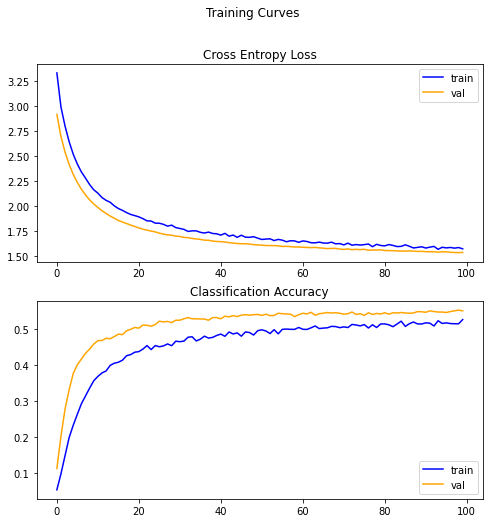


Test set evaluation metrics
---------------------------
Loss:     1.565
Accuracy: 53.175%


In [ ]:
loss, accuracy = model_report(VGG16_MODEL, VGG16_MODEL_history)
accuracies["VGG_NONE"] = accuracy

##### Εκπαίδευση κεφαλής ταξινόμησης και ορισμένων συνελικτικών επιπέδων που βρίσκονται κοντά σε αυτή

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  vgg_model=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  VGG16_MODEL=vgg_model.layers[0](vgg_model)

  for layer in VGG16_MODEL.layers[:15]:
      layer.trainable=False
  for layer in VGG16_MODEL.layers[15:]:
      layer.trainable=True

  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
VGG16_MODEL = init_VGG16_model(True)
VGG16_MODEL_history = train_model(VGG16_MODEL)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                10260     
Total params: 14,724,948
Trainable params: 7,089,684
Non-trainable params: 7,635,264
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 5s 17ms/step - loss: 2.4057 - accuracy: 0.2897 - val_loss: 1.3783 - val_accuracy: 0.5944
Epoch 2/100
266/266 [==============================] - 4s 16ms/step - loss: 1.3858 - accu

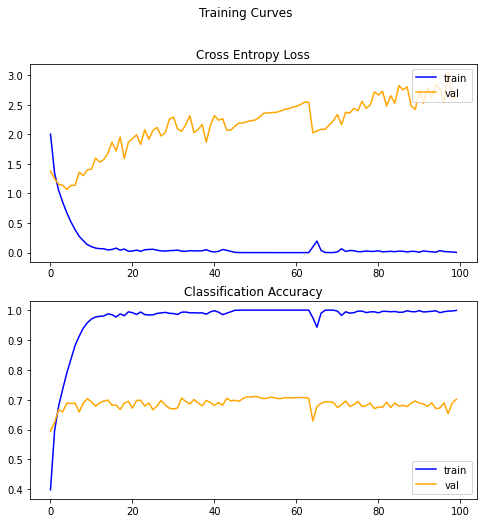


Test set evaluation metrics
---------------------------
Loss:     2.569
Accuracy: 68.056%


In [ ]:
loss, accuracy = model_report(VGG16_MODEL, VGG16_MODEL_history)
accuracies["VGG_FEW"] = accuracy

##### Εκπαίδευση ολόκληρου του δικτύου

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  vgg_model=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  VGG16_MODEL=vgg_model.layers[0](vgg_model)

  # unfreeze conv layers
  VGG16_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
VGG16_MODEL = init_VGG16_model(True)
VGG16_MODEL_history = train_model(VGG16_MODEL)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_8 ( (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 9s 30ms/step - loss: 2.8183 - accuracy: 0.1473 - val_loss: 1.7259 - val_accuracy: 0.4867
Epoch 2/100
266/266 [==============================] - 8s 29ms/step - loss: 1.6768 - accuracy: 

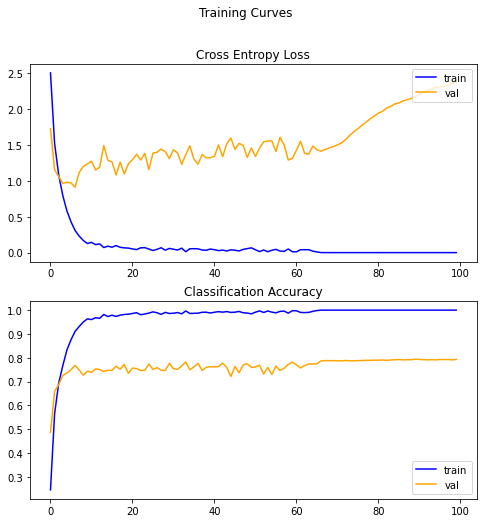


Test set evaluation metrics
---------------------------
Loss:     2.502
Accuracy: 78.720%


In [ ]:
loss, accuracy = model_report(VGG16_MODEL, VGG16_MODEL_history)
losses["VGG_ALL"] = loss
accuracies["VGG_ALL"] = accuracy

#### MobileNet

Στη συνέχεια εξετάζουμε το [MobileNet](https://towardsdatascience.com/3-small-but-powerful-convolutional-networks-27ef86faa42d). Πρόκειται για ένα συνελικτικό δίκτυο του οποίου η αποτελεσματικότητα οφείλεται στην αντικατάσταση των convolution blocks από depthwise separable convolution blocks, δηλαδή ένα depthwise ακολουθούμενο από ένα pointwise. Σε ένα depthwise συνελικτικό επίπεδο υπάρχει ένα φίλτρο για κάθε input channel και επομένως ο αριθμός των output channels ισούται με τον αριθμό των input channels. Αντιθέτως, ένα pointwise συνελικτικό επίπεδο έχει ένα φίλτρο για κάθε output channel.

##### Εκπαίδευση μόνο της κεφαλής ταξινόμησης

In [ ]:
# transfer learning: MobileNet trained on ImageNet without the top layer

def init_MobileNetV2_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  mobilenetV2_model=tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3), include_top=False, weights='imagenet')
  
  MobileNetV2_MODEL=mobilenetV2_model.layers[0](mobilenetV2_model)

  # freeze conv layers
  MobileNetV2_MODEL.trainable=False
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([MobileNetV2_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate=lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
MobileNetV2_MODEL = init_MobileNetV2_model(True)
MobileNetV2_MODEL_history = train_model(MobileNetV2_MODEL, train_ds_res, validation_ds_res)

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                25620     
Total params: 2,283,604
Trainable params: 25,620
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 20s 65ms/step - loss: 2.9378 - accuracy: 0.1384 - val_loss: 1.9172 - val_accuracy: 0.4867
Epoch 2/100
266/266 [========

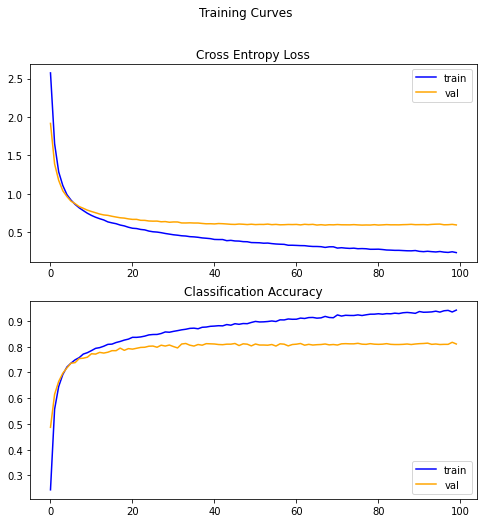


Test set evaluation metrics
---------------------------
Loss:     0.605
Accuracy: 81.944%


In [ ]:
loss, accuracy = model_report(MobileNetV2_MODEL, MobileNetV2_MODEL_history, test_ds_res)
accuracies["MOBILENET_NONE"] = accuracy

##### Εκπαίδευση κεφαλής ταξινόμησης και ορισμένων συνελικτικών επιπέδων που βρίσκονται κοντά σε αυτή

In [ ]:
# transfer learning: MobileNet trained on ImageNet without the top layer

def init_MobileNetV2_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  mobilenetV2_model=tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3), include_top=False, weights='imagenet')
  
  MobileNetV2_MODEL=mobilenetV2_model.layers[0](mobilenetV2_model)

  for layer in MobileNetV2_MODEL.layers[:152]:
    layer.trainable=False
  for layer in MobileNetV2_MODEL.layers[152:]:
    layer.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([MobileNetV2_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
MobileNetV2_MODEL = init_MobileNetV2_model(True)
MobileNetV2_MODEL_history = train_model(MobileNetV2_MODEL, train_ds_res, validation_ds_res)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                25620     
Total params: 2,283,604
Trainable params: 28,180
Non-trainable params: 2,255,424
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 20s 66ms/step - loss: 2.7484 - accuracy: 0.1753 - val_loss: 1.8299 - val_accuracy: 0.4874
Epoch 2/100
266/266 [==============================] - 17s 63ms/step - loss: 1.7015 - accura

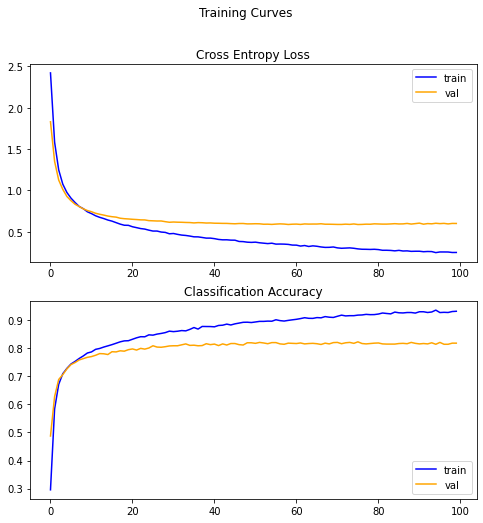


Test set evaluation metrics
---------------------------
Loss:     0.598
Accuracy: 82.044%


In [ ]:
loss, accuracy = model_report(MobileNetV2_MODEL, MobileNetV2_MODEL_history, test_ds_res)
accuracies["MOBILENET_FEW"] = accuracy

##### Εκπαίδευση ολόκληρου του δικτύου

In [ ]:
# transfer learning: MobileNet trained on ImageNet without the top layer

def init_MobileNetV2_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  mobilenetV2_model=tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3), include_top=False, weights='imagenet')
  
  MobileNetV2_MODEL=mobilenetV2_model.layers[0](mobilenetV2_model)

  # unfreeze conv layers
  MobileNetV2_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([MobileNetV2_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
MobileNetV2_MODEL = init_MobileNetV2_model(True)
MobileNetV2_MODEL_history = train_model(MobileNetV2_MODEL, train_ds_res, validation_ds_res)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 64s 227ms/step - loss: 1.7047 - accuracy: 0.5111 - val_loss: 2.7579 - val_accuracy: 0.3943
Epoch 2/100
266/266 [==============================] - 59s 222ms/step - loss: 0.3470 - accu

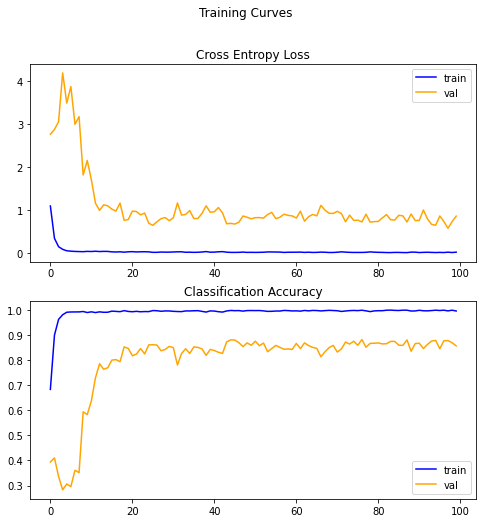


Test set evaluation metrics
---------------------------
Loss:     0.799
Accuracy: 85.367%


In [ ]:
loss, accuracy = model_report(MobileNetV2_MODEL, MobileNetV2_MODEL_history, test_ds_res)
losses["MOBILENET_ALL"] = loss
accuracies["MOBILENET_ALL"] = accuracy

#### DenseNet

Τέλος, εξετάζουμε το [DenseNet](https://towardsdatascience.com/review-densenet-image-classification-b6631a8ef803). Στο μοντέλο αυτό κάθε επίπεδο λαμβάνει πρόσθετες εισόδους από όλα τα προηγούμενα και επιπλέον περνάει σε όλα τα επόμενα τα δικά του feature-maps. Συνεπώς, κάθε επίπεδο λαμβάνει μία "συλλογική γνώση" από όλα τα προηγούμενα επίπεδα. Αυτό επιτρέπει στο δίκτυο να είναι απλούστερο σε δομή και να έχει παραδείγματος χάριν μικρότερο αριθμό από channels. Στην ακόλουθη εικόνα φαίνεται ένα απλό DenseNet block:

<center>
<img src="https://i.ibb.co/j5DwR92/155174376-897927751019820-3165352346679468358-n.png" alt="dense" border="0"  height="250" width="550">
</center>

##### Εκπαίδευση μόνο της κεφαλής ταξινόμησης

In [ ]:
# transfer learning: DenseNet trained on ImageNet without the top layer

def init_DENSENET_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  densenet_model=tf.keras.applications.densenet.DenseNet121(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  DENSENET_MODEL=densenet_model.layers[0](densenet_model)

  # freeze conv layers
  DENSENET_MODEL.trainable = False

  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([DENSENET_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
DENSENET_MODEL = init_DENSENET_model(True)
DENSENET_MODEL_history = train_model(DENSENET_MODEL)

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                20500     
Total params: 7,058,004
Trainable params: 20,500
Non-trainable params: 7,037,504
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 10s 17ms/step - loss: 4.3131 - accuracy: 0.0646 - val_loss: 2.8074 - val_accuracy: 0.1742
Epoch 2/100
266/266 [======

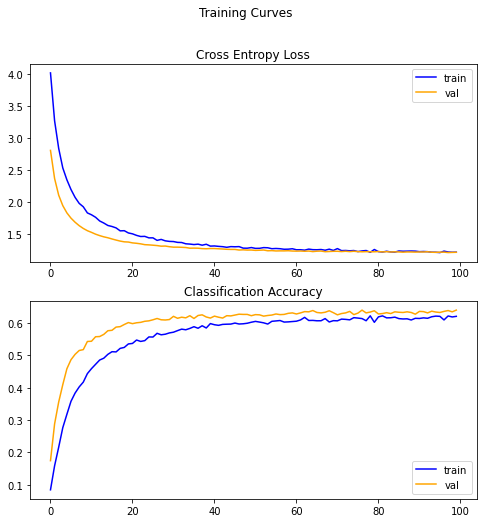


Test set evaluation metrics
---------------------------
Loss:     1.298
Accuracy: 61.756%


In [ ]:
loss, accuracy = model_report(DENSENET_MODEL, DENSENET_MODEL_history)
accuracies["DENSENET_NONE"] = accuracy

##### Εκπαίδευση κεφαλής ταξινόμησης και ορισμένων συνελικτικών επιπέδων που βρίσκονται κοντά σε αυτή

In [ ]:
# transfer learning: DenseNet trained on ImageNet without the top layer

def init_DENSENET_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  densenet_model=tf.keras.applications.densenet.DenseNet121(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  DENSENET_MODEL=densenet_model.layers[0](densenet_model)

  for layer in DENSENET_MODEL.layers[:313]:
    layer.trainable=False
  for layer in DENSENET_MODEL.layers[313:]:
    layer.trainable=True

  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([DENSENET_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
DENSENET_MODEL = init_DENSENET_model(True)
DENSENET_MODEL_history = train_model(DENSENET_MODEL)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_20  (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 20)                20500     
Total params: 7,058,004
Trainable params: 2,180,628
Non-trainable params: 4,877,376
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 20s 24ms/step - loss: 4.1380 - accuracy: 0.1036 - val_loss: 2.1078 - val_accuracy: 0.4056
Epoch 2/100
266/266 [==============================] - 5s 18ms/step - loss: 2.4761 - acc

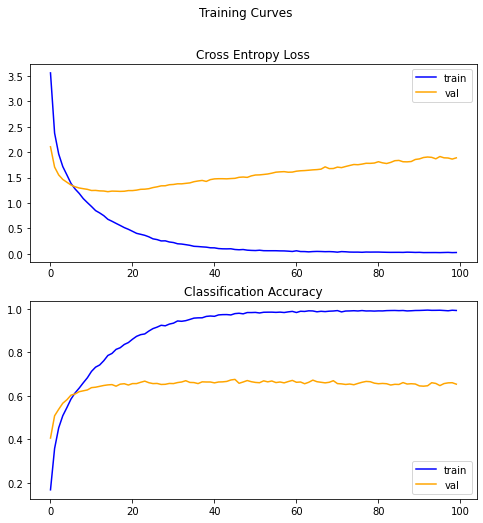


Test set evaluation metrics
---------------------------
Loss:     1.933
Accuracy: 64.435%


In [ ]:
loss, accuracy = model_report(DENSENET_MODEL, DENSENET_MODEL_history)
accuracies["DENSENET_FEW"] = accuracy

##### Εκπαίδευση ολόκληρου του δικτύου

In [ ]:
# transfer learning: DenseNet trained on ImageNet without the top layer

def init_DENSENET_model(summary, optimizer = tf.optimizers.Adam, lr = 0.00005):
  densenet_model=tf.keras.applications.densenet.DenseNet121(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  DENSENET_MODEL=densenet_model.layers[0](densenet_model)

  # unfreeze conv layers
  DENSENET_MODEL.trainable = True

  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(CLASSES_NUM,activation='softmax')
  model = tf.keras.Sequential([DENSENET_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
DENSENET_MODEL = init_DENSENET_model(True)
DENSENET_MODEL_history = train_model(DENSENET_MODEL)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/100
266/266 [==============================] - 19s 36ms/step - loss: 3.5545 - accuracy: 0.1570 - val_loss: 1.8660 - val_accuracy: 0.5193
Epoch 2/100
266/266 [==============================] - 8s 30ms/step - loss: 1.7508 - accura

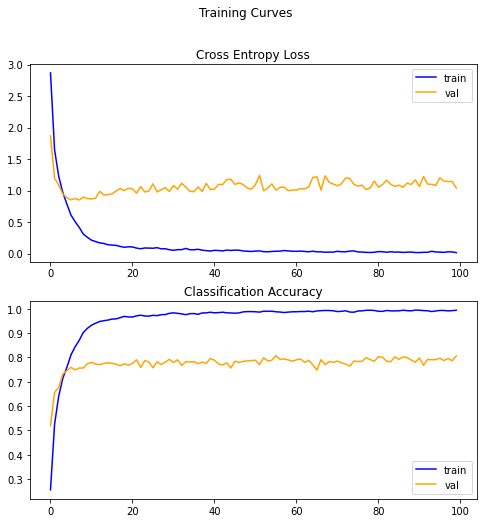


Test set evaluation metrics
---------------------------
Loss:     1.005
Accuracy: 80.456%


In [ ]:
loss, accuracy = model_report(DENSENET_MODEL, DENSENET_MODEL_history)
losses["DENSENET_ALL"] = loss
accuracies["DENSENET_ALL"] = accuracy 

#### Bar plots σύγκρισης

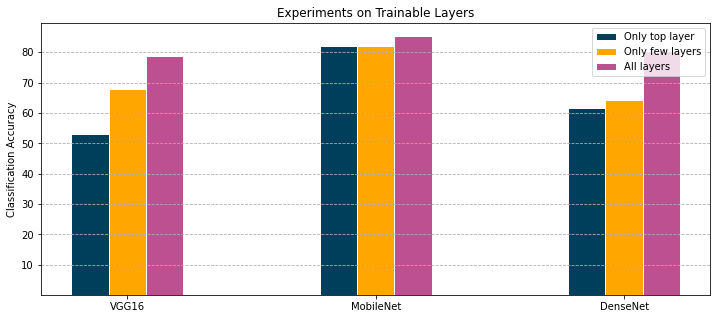

In [ ]:
# set width of bar
barWidth = 0.15
model_names = ['VGG16', 'MobileNet', 'DenseNet']

# set height of bars
bar1 = [accuracies["VGG_NONE"],accuracies["MOBILENET_NONE"],accuracies["DENSENET_NONE"]]
bar2 = [accuracies["VGG_FEW"],accuracies["MOBILENET_FEW"],accuracies["DENSENET_FEW"]]
bar3 = [accuracies["VGG_ALL"],accuracies["MOBILENET_ALL"],accuracies["DENSENET_ALL"]]

# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12,5))
plt.bar(r1, bar1, color='#003f5c', width=barWidth, edgecolor='white', label = 'Only top layer')
plt.bar(r2, bar2, color='#ffa600', width=barWidth, edgecolor='white', label = 'Only few layers')
plt.bar(r3, bar3, color='#bc5090', width=barWidth, edgecolor='white', label = 'All layers')
plt.xticks([r + barWidth for r in range(3)], model_names)
plt.ylim(bottom=0.1)
plt.legend(loc='best')
plt.title("Experiments on Trainable Layers")
plt.ylabel("Classification Accuracy")
plt.grid(axis="y", linestyle="--")
plt.show()

Παρατηρούμε πως και για τα 3 δίκτυα, **όσο μεγαλύτερο είναι το πλήθος των επιπέδων που εκπαιδεύουμε τόσο καλύτερη είναι η επίδοση τους στα test δεδομένα**. Συγκεκριμένα, παρατηρούμε πως όταν κάνουμε train μόνο την κεφαλή ταξινόμησης λαμβάνουμε τη χαμηλότερη ακρίβεια. Αυτή αυξάνεται μόλις εκπαιδεύουμε και ορισμένα συνελικτικά επίπεδα (Convolutional layers) που βρίσκονται προς την έξοδο του δικτύου. Ωστόσο, η πιο επιτυχημένη κατηγοριοποίηση προκύπτει για εκπαίδευση πάνω στο σύνολο όλων των επιπέδων κάθε μοντέλου. Για το λόγο αυτό, στην επόμενη ενότητα ασχολούμαστε μόνο με τη βελτιστοποίηση των δικτύων μεταφοράς μάθησης που έχουν trainable όλα τους τα layers.

## **Βελτιστοποίηση δικτύων**

Όπως είδαμε στην εκπαίδευση των μέχρι τώρα δικτύων, είναι αρκετά έντονο το φαινόμενο του overfitting, με τα δίκτυα να μαθαίνουν άψογα τα δεδομένα εκπαίδευσης αλλά να αδυνατούν να γενικεύσουν επιτυχημένα το γενικότερο πρόβλημα κατηγοριοποίησης. Για το σκοπό αυτό, στην ενότητα αυτή, εφαρμόζουμε διάφορες τεχνικές βελτιστοποίησης με στόχο την αύξηση της επίδοσης των μοντέλων μας και την αντιμετώπιση της υπερεκπαίδευσης. Συγκεκριμένα χρησιμοποιούμε τις ακόλουθες τεχνικές:

- **Early Stopping**: Aποτελεί μια τεχνική αντιμετώπισης του overfitting, κατά την οποία η εκπαίδευση του δικτύου διακόπτεται πρόωρα αν δεν εμφανίζεται βελτίωση ως προς κάποια μετρική απόδοσης που παρακολουθούμε (συνήθως αυτή είναι το validation loss).  Θεωρούμε μια παράμετρο ανοχής patience, η οποία καθορίζει το πόσο ανεκτικοί είμαστε ως προς την επιδείνωση του loss. Συγκεκριμένα, αν αυτό δεν βελτιωθεί μετά από patience το πλήθος εποχές, τότε διακόπτουμε την εκπαίδευση του δικτύου. Επιλέγουμε να θέσουμε το patience ίσο με 20 ενώ θέτουμε και την παράμετρο restore_best_weights σε True, ώστε να αποθηκευτεί εν τέλει το μοντέλο που κατά την διαδικασία της εκπαίδευσης έδωσε το μικρότερο validation loss:
```python
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
```

- **Dropout**: Είναι μια μορφή κανονικοποίησης που αναγκάζει τα βάρη στο δίκτυο να λαμβάνουν μόνο μικρές τιμές, γεγονός που καθιστά την κατανομή των τιμών βάρους κανονική και το δίκτυο μπορεί να μειώσει την υπερεκπαίδευση σε μικρά δείγματα εκπαίδευσης. Όταν εφαρμόσουμε το dropout σε ένα επίπεδο, πετάμε τυχαία (θέτοντας τα μηδέν) ένα πλήθος μονάδων εξόδου από το επίπεδο που το εφαρμόζουμε, κατά τη διάρκεια της διαδικασίας εκπαίδευσης. Το dropout παίρνει έναν κλασματικό αριθμό ως τιμή εισόδου του, όπως 0.1, 0.2, 0.4, κλπ. Αυτό ισοδυναμεί με κατάργηση 10\%, 20\% ή 40\% των μονάδων εξόδου τυχαία από το εφαρμοζόμενο επίπεδο. 

- **L2 Regularization**: Η τεχνική αυτή προσθέτει στη loss function ένα penalty term που ισούται με τo τετράγωνο της L2 νόρμας του διανύσματος βαρών. Το μέγεθος της κανονικοποίησης ρυθμίζεται από την παράμετρο λ. Αν αυτή είναι μηδενική, τότε δεν υφίσταται καθόλου regularization και η loss function αποτελείται μόνο από το σφάλμα μεταξύ της εξόδου $y$ και της πρόβλεψης $\hat{y}$. Για πολύ μεγάλες τιμές του λ, προστίθεται μεγάλο επιπλέον βάρος και αυτό οδηγεί το μοντέλο σε underfitting. Φαίνεται λοιπόν πως η κατάλληλη επιλογή του λ είναι ιδιαίτερα σημαντική. Μετά από δοκιμές καταλήγουμε στην τιμή 0.001.

<center>
<img src="https://i.ibb.co/bBGGjwM/l2-regularization.png" alt="l2-regularization" border="0"  height="100" width="350">
</center>


- **Batch Normalization**: Χρησιμοποιείται ως τεχνική βελτίωσης της ταχύτητας εκπαίδευσης, της σταθερότητας αλλά και της επίδοσης στα νευρωνικά δίκτυα. Ουσιαστικά χρησιμοποιείται ως ένα μέσο κανονικοποίησης του επιπέδου εισόδου, πραγματοποιώντας κατάλληλο scaling των activations. Η χρησιμότητα αυτού του layer είναι αδιαμφισβήτητη, καθώς χρησιμοποιείται σε πολυάριθμες εφαρμογές τα τελευταία χρόνια. Παρόλα αυτά, ο λόγος στον οποίο έγκειται αυτή η αποτελεσματικότητα δεν έχει πλήρως εξακριβωθεί. Η πιο πιθανή αιτία, φαίνεται πως έχει να κάνει με το πρόβλημα του internal covariate shift, που επηρεάζει το learning rate του νευρωνικού λόγω της αρχικοποίησης των παραμέτρων. Η χρήση του batch normalization δείχνει να αμβλύνει το πρόβλημα αυτό.

- **Data augmentation**: Η υπερεκπαίδευση συμβαίνει γενικά όταν υπάρχει μικρός αριθμός παραδειγμάτων εκπαίδευσης. Ένας τρόπος για να διορθώσουμε αυτό το πρόβλημα είναι να αυξήσουμε το σύνολο δεδομένων εκπαίδευσης, χρησιμοποιώντας τυχαίους μετασχηματισμούς (περιστροφές, μετατοπίσεις κ.τ.λ.) των αρχικών εικόνων. Ο στόχος είναι ότι κατά τη διάρκεια της εκπαίδευσης, το μοντέλο να μην έχει δει ποτέ την ίδια εικόνα. Αυτό βοηθά στην έκθεση του μοντέλου σε περισσότερες εκδόσεις των δεδομένων ώστε να γενικεύει καλύτερα. Χρησιμοποιώντας το "ImageDataGenerator" του "tf.keras", δοκιμάζουμε διαφορετικούς μετασχηματισμούς στο σύνολο δεδομένων εκπαίδευσης και τα "νέα" δεδομένα χρησιμοποιούνται κατά τη διάρκεια της εκπαιδευτικής διαδικασίας. Ωστόσο, η διαδικασία αυτή φάινεται πως δεν βελτιώνει την ακρίβεια των μοντέλων μας, για αυτό και γίνεται χρήση μόνο των τεσσάρων προαναφερθεισών τεχνικών.



In [ ]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(
                            rotation_range=90,
                            width_shift_range=0.1, 
                            height_shift_range=0.1,
                            horizontal_flip=True
                    )

# Data augmentation
train_ds = image_gen_train.flow(x=x_train,
                                y=y_train,
                                batch_size=BATCH_SIZE,
                                shuffle=True)

### Δίκτυα "from scratch"

Ορίζουμε τώρα τα λεξικά losses_opt και accuracies_opt τα οποία έχουν για κλειδιά τα ονόματα των μοντέλων που εξετάζουμε και για τιμές τα βελτιστοποιημένα losses και accuracies αντίστοιχα. Ο λόγος για τον οποίο αποθηκεύουμε τις τιμές αυτές είναι ούτως ώστε να τις συγκρίνουμε με τις μη-βελτιστοποιημένες και να δούμε κατά πόσο βελτιώθηκαν τα μοντέλα μας. Επιπλέον ορίζουμε το callback το οποίο δίνουμε σαν παράμετρο στην train_model (και συγκεκριμένα στην model.fit) προκειμένου να υλοποιήσουμε το EarlyStopping που αναφέραμε προηγουμένως.

In [ ]:
losses_opt = {}
accuracies_opt = {}
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#### Simple CNN

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model_optimized(summary, optimizer = tf.optimizers.Adam, lr = 0.00005, classes_num = 20):

  model = models.Sequential()

  model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(classes_num, activation='softmax'))
  
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True)
SIMPLE_MODEL_OPTIMIZED_history = train_model(SIMPLE_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)       

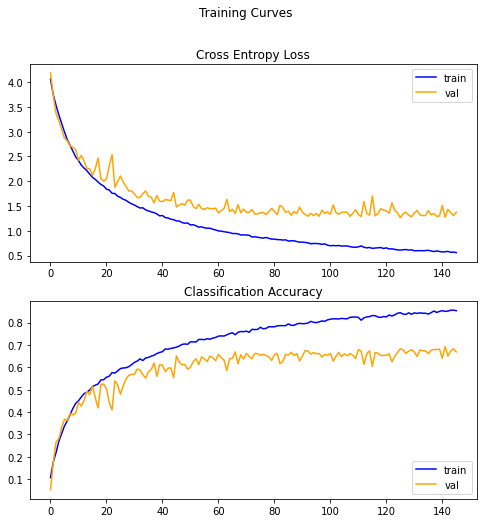


Test set evaluation metrics
---------------------------
Loss:     1.265
Accuracy: 68.254%


In [ ]:
loss, accuracy = model_report(SIMPLE_MODEL_OPTIMIZED, SIMPLE_MODEL_OPTIMIZED_history)
losses_opt["SIMPLE_MODEL"] = loss
accuracies_opt["SIMPLE_MODEL"] = accuracy

#### CNN1

In [ ]:
def init_cnn1_model_optimized(summary, optimizer = tf.optimizers.Adam, lr = 0.00005, classes_num = 20):
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), input_shape=(32, 32, 3))) 
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=l2(0.01)))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.AveragePooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(1024,activation='relu'))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(classes_num,activation='softmax'))

  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True)
CNN1_MODEL_OPTIMIZED_history = train_model(CNN1_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 64)       

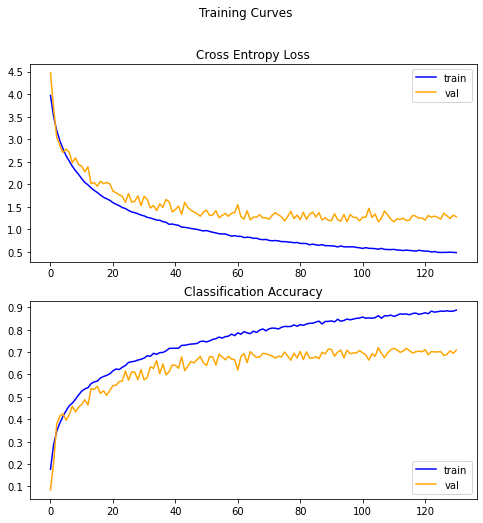


Test set evaluation metrics
---------------------------
Loss:     1.166
Accuracy: 72.867%


In [ ]:
loss, accuracy = model_report(CNN1_MODEL_OPTIMIZED, CNN1_MODEL_OPTIMIZED_history)
losses_opt["CNN1"] = loss
accuracies_opt["CNN1"] = accuracy

#### CNN2

In [ ]:
def init_cnn2_model_optimized(summary, optimizer = tf.optimizers.Adam, lr = 0.00005, classes_num = 20):
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.001), padding="same", input_shape=(32, 32, 3))) 
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=l2(0.01), padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.Dropout(0.2))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(classes_num,activation='softmax'))

  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True)
CNN2_MODEL_OPTIMIZED_history = train_model(CNN2_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_9 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 64)       

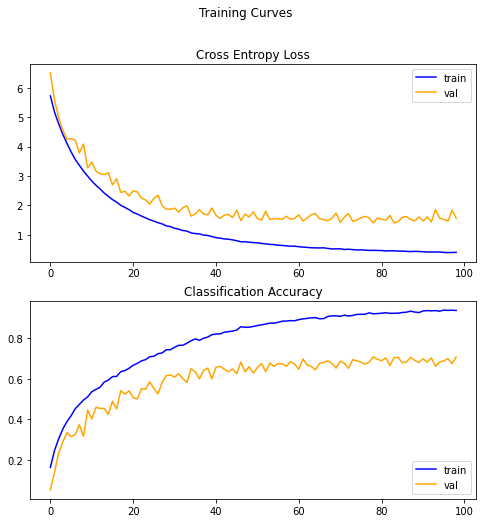


Test set evaluation metrics
---------------------------
Loss:     1.391
Accuracy: 71.528%


In [ ]:
loss, accuracy = model_report(CNN2_MODEL_OPTIMIZED, CNN2_MODEL_OPTIMIZED_history)
losses_opt["CNN2"] = loss
accuracies_opt["CNN2"] = accuracy

### Μεταφορά μάθησης

#### VGG16

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model_optimized(summary, optimizer = tf.optimizers.Adam, lr = 0.00005, classes_num = 20):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  # unfreeze conv layers
  VGG16_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(classes_num,activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True)
VGG16_MODEL_OPTIMIZED_history = train_model(VGG16_MODEL_OPTIMIZED, epochs = 200, callbacks = [callback])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_10  (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 9s 30ms/step - loss: 2.8043 - accuracy: 0.1621 - val_loss: 1.7364 - val_accuracy: 0.5020
Epoch 2/200
266/266 [==============================] - 8s 29ms/step - loss: 1.6042 - accuracy: 

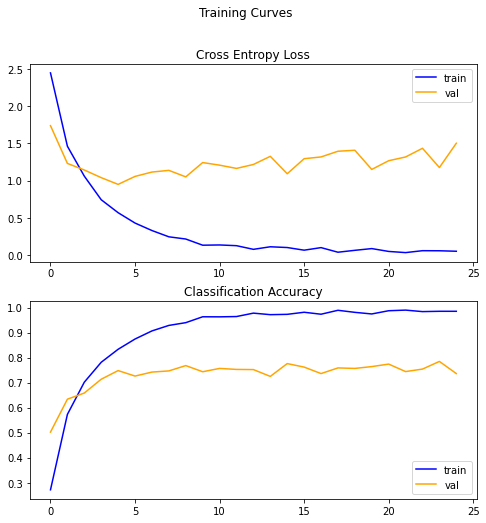


Test set evaluation metrics
---------------------------
Loss:     0.931
Accuracy: 74.504%


In [ ]:
loss, accuracy = model_report(VGG16_MODEL_OPTIMIZED, VGG16_MODEL_OPTIMIZED_history)
losses_opt["VGG_ALL"] = loss
accuracies_opt["VGG_ALL"] = accuracy

#### MobileNet

In [ ]:
#transfer learning: MobileNet trained on ImageNet without the top layer

def init_MobileNetV2_model_optimized(summary, optimizer = tf.optimizers.Adam, lr = 0.00005, classes_num = 20):
  mobilenetV2_model=tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3), include_top=False, weights='imagenet')
  
  MobileNetV2_MODEL=mobilenetV2_model.layers[0](mobilenetV2_model)

  # unfreeze conv layers
  MobileNetV2_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(classes_num,activation='softmax')
  model = tf.keras.Sequential([MobileNetV2_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True)
MobileNetV2_MODEL_OPTIMIZED_history = train_model(MobileNetV2_MODEL_OPTIMIZED, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks=[callback])

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 65s 231ms/step - loss: 1.7136 - accuracy: 0.5085 - val_loss: 2.1306 - val_accuracy: 0.4561
Epoch 2/200
266/266 [=======

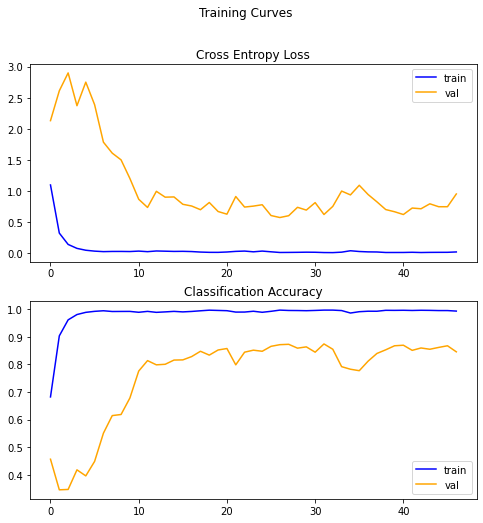


Test set evaluation metrics
---------------------------
Loss:     0.619
Accuracy: 88.145%


In [ ]:
loss, accuracy = model_report(MobileNetV2_MODEL_OPTIMIZED, MobileNetV2_MODEL_OPTIMIZED_history, test_ds_res)
losses_opt["MOBILENET_ALL"] = loss
accuracies_opt["MOBILENET_ALL"] = accuracy

#### DenseNet

In [ ]:
# transfer learning: DenseNet trained on ImageNet without the top layer

def init_DENSENET_model_optimized(summary, optimizer = tf.optimizers.Adam, lr = 0.00005, classes_num = 20):
  densenet_model=tf.keras.applications.densenet.DenseNet121(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  DENSENET_MODEL=densenet_model.layers[0](densenet_model)

  # unfreeze conv layers
  DENSENET_MODEL.trainable = True

  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(classes_num,activation='softmax')
  model = tf.keras.Sequential([DENSENET_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=optimizer(learning_rate = lr), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True)
DENSENET_MODEL_OPTIMIZED_history = train_model(DENSENET_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 26s 37ms/step - loss: 3.6479 - accuracy: 0.1447 - val_loss: 1.8509 - val_accuracy: 0.5007
Epoch 2/200
266/266 [========

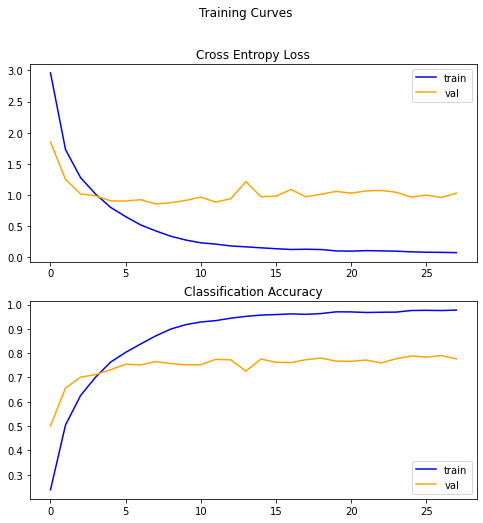


Test set evaluation metrics
---------------------------
Loss:     0.908
Accuracy: 75.496%


In [ ]:
loss, accuracy = model_report(DENSENET_MODEL_OPTIMIZED, DENSENET_MODEL_OPTIMIZED_history)
losses_opt["DENSENET_ALL"] = loss
accuracies_opt["DENSENET_ALL"] = accuracy

### Bar plots σύγκρισης

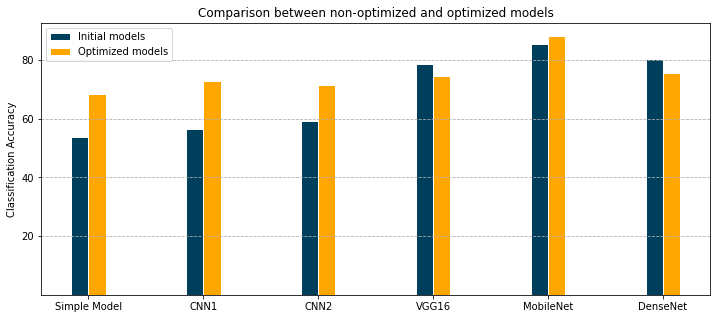

In [ ]:
# set width of bar
barWidth = 0.15
model_names = ['Simple Model', 'CNN1', 'CNN2', 'VGG16', 'MobileNet', 'DenseNet']

# set height of bars
bar1 = [accuracies["SIMPLE_MODEL"],accuracies["CNN1"],accuracies["CNN2"],accuracies["VGG_ALL"],accuracies["MOBILENET_ALL"],accuracies["DENSENET_ALL"]]
bar2 = [accuracies_opt["SIMPLE_MODEL"],accuracies_opt["CNN1"],accuracies_opt["CNN2"],accuracies_opt["VGG_ALL"],accuracies_opt["MOBILENET_ALL"],accuracies_opt["DENSENET_ALL"]]

# Set position of bar on X axis
r1 = np.arange(6)
r2 = [x + barWidth for x in r1]


plt.figure(figsize=(12,5))
plt.bar(r1, bar1, color='#003f5c', width=barWidth, edgecolor='white', label = 'Initial models')
plt.bar(r2, bar2, color='#ffa600', width=barWidth, edgecolor='white', label = 'Optimized models')
plt.xticks([r + (barWidth/2) for r in range(6)], model_names)
plt.ylim(bottom=0.1)
plt.legend(loc='best')
plt.title("Comparison between non-optimized and optimized models")
plt.ylabel("Classification Accuracy")
plt.grid(axis="y", linestyle="--")
plt.show()

Παρατηρούμε πως τα περισσότερα βελτιστοποιημένα μοντέλα εμφανίζουν άνοδο στην επίδοση τους σε σχέση με τα αρχικά (μη-βελτιστοποιημένα). Η αύξηση αυτή είναι περισσότερο αισθητή στα from scratch μοντέλα όπου ανέρχεται γύρω στο 15%. Στο Transfer learning παρατηρούμε πως για τα VGG16 και DenseNet έχουμε μια μικρή πτώση στην ακρίβεια κατηγοριοποίησης. Αυτό οφείλεται στο γεγονός ότι κατά τη διαδικασία της βελτιστοποίησης χρησιμοποιούμε Early Stopping κάνοντας monitor το validation loss και όχι το accuracy. Επομένως, είναι πιθανό να λάβουμε τελικά ένα βελτιστοποιημένο μοντέλο με λίγο μικρότερη ακρίβεια αλλά παράλληλα μικρότερο σφάλμα ταξινόμησης. Κάτι τέτοιο είναι επιθυμητό καθώς το μοντέλο μπορεί να αποφανθεί με μεγαλύτερη βεβαιότητα για την κατηγοριοποίηση των εικόνων.


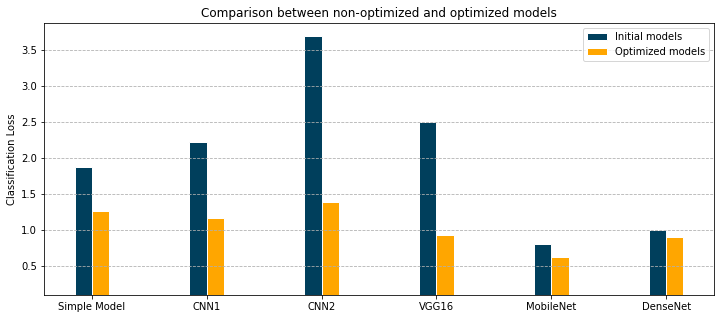

In [ ]:
# set width of bar
barWidth = 0.15
model_names = ['Simple Model', 'CNN1', 'CNN2', 'VGG16', 'MobileNet', 'DenseNet']

# set height of bars
bar1 = [losses["SIMPLE_MODEL"],losses["CNN1"],losses["CNN2"],losses["VGG_ALL"],losses["MOBILENET_ALL"],losses["DENSENET_ALL"]]
bar2 = [losses_opt["SIMPLE_MODEL"],losses_opt["CNN1"],losses_opt["CNN2"],losses_opt["VGG_ALL"],losses_opt["MOBILENET_ALL"],losses_opt["DENSENET_ALL"]]

# Set position of bar on X axis
r1 = np.arange(6)
r2 = [x + barWidth for x in r1]


plt.figure(figsize=(12,5))
plt.bar(r1, bar1, color='#003f5c', width=barWidth, edgecolor='white', label = 'Initial models')
plt.bar(r2, bar2, color='#ffa600', width=barWidth, edgecolor='white', label = 'Optimized models')
plt.xticks([r + (barWidth/2) for r in range(6)], model_names)
plt.ylim(bottom=0.1)
plt.legend(loc='best')
plt.title("Comparison between non-optimized and optimized models")
plt.ylabel("Classification Loss")
plt.grid(axis="y", linestyle="--")
plt.show()

Παρατηρούμε πως όλα τα βελτιστοποιημένα μοντέλα εμφανίζουν μικρότερο loss ως προς τα αρχικά δεδομένα. Αυτό, όπως αναφέρθηκε και πριν, είναι αναμενόμενο, εφόσον με χρήση Early Stopping διακόπτουμε τη διαδικασία της εκπαίδευσης όταν δεν υπάρχει βελτίωση ως προς το validation loss για πάνω από 20 εποχές και κρατάμε το μοντέλο εκείνο με το μικρότερο σφάλμα. Εδώ αξίζει να σημειωθεί πως σημαντική βελτίωση εμφανίζουν τα from scratch μοντέλα καθώς και το VGG16. 

## **Επίδραση της απόδοσης με μεταβολή του αριθμού των κλάσεων**

Αυξάνουμε διαδοχικά τον αριθμό των κλάσεων (και αντίστοιχα και τα δεδομένα μας) από 20 σε 40,60 και τέλος σε 80 ώστε να δούμε πως η αύξηση αυτή επηρεάζει την ακρίβεια των βελτιστοποιημένων μοντέλων μας (test accuracy). Να σημειωθεί πως όλα τα υπόλοιπα μεγέθη διατηρούνται σταθερά.

Αρχικά ορίζουμε το λεξικό fit_times το οποίο περιέχει τους χρόνους εκπαίδευσης όλων των μοντέλων όταν ο αριθμός των κλάσεων ισούται με 80.

In [ ]:
fit_times = {}

Στο σημείο αυτό επαναορίζουμε την συνάρτηση train_model ώστε να επιστρέφει εκτός από το history και τον χρόνο εκπαίδευσης.

In [ ]:
def train_model(model, train_dataset = train_ds, validation_dataset = validation_ds, epochs = 100, callbacks = None, steps_per_epoch = int(np.ceil(x_train.shape[0]/BATCH_SIZE)), validation_steps = int(np.ceil(x_val.shape[0]/BATCH_SIZE))):
    start_time = time.time()
    history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_dataset, validation_steps=validation_steps, callbacks=callbacks)
    fit_time = time.time() - start_time
    return history, fit_time

Ακόμα ορίζουμε την συνάρτηση fit_and_test_model την οποία χρησιμοποιούμε στην ενότητα αυτή για να αποφύγουμε την επανάληψη του ίδιου τμήματος κώδικα. Αυτή δημιουργεί το νέο dataset με βάση τον αριθμό των κλάσεων που δέχεται σαν όρισμα και στη συνέχεια εκπαιδεύει και εξετάζει το μοντέλο. Στην περίπτωση που ο αριθμός των κλάσεων ισούται με 80 συμπληρώνει κατάλληλα το λεξικό fit_times.

In [ ]:
def fit_and_test_model(number_of_classes, optimized_model, model_name):
    
    # select the number of classes
    cifar100_classes_url = select_classes_number(number_of_classes)

    team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
    CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

    our_index = team_classes.iloc[team_seed,:].values.tolist()
    our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
    train_index = get_ds_index(y_train_all, our_index)
    test_index = get_ds_index(y_test_all, our_index)

    x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
    y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
    x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
    y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

    # get (train) dataset dimensions
    data_size, img_rows, img_cols, img_channels = x_train_ds.shape

    # set validation set percentage (wrt the training set size)
    validation_percentage = 0.15
    val_size = round(validation_percentage * data_size)

    # Reserve val_size samples for validation and normalize all values
    x_val = x_train_ds[-val_size:]/255
    y_val = y_train_ds[-val_size:]
    x_train = x_train_ds[:-val_size]/255
    y_train = y_train_ds[:-val_size]
    x_test = x_test_ds/255
    y_test = y_test_ds

    y_train = create_new_labels(our_index,y_train)
    y_val = create_new_labels(our_index,y_val)
    y_test = create_new_labels(our_index,y_test)

    train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
    validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
    test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

    train_ds_res = train_ds.map(resize_transform)
    validation_ds_res = validation_ds.map(resize_transform)
    test_ds_res = test_ds.map(resize_transform)

    epoch_steps = int(np.ceil(x_train.shape[0]/BATCH_SIZE))
    val_steps = int(np.ceil(x_val.shape[0]/BATCH_SIZE))
    eval_steps = int(np.ceil(x_test.shape[0]/BATCH_SIZE))

    if model_name == "MobileNet":
       optimized_model_history, fit_time = train_model(optimized_model, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks = [callback], steps_per_epoch = epoch_steps, validation_steps = val_steps)
       _, accuracy = model_report(optimized_model, optimized_model_history, evaluation_dataset = test_ds_res, evaluation_steps = eval_steps)
    else:
       optimized_model_history, fit_time = train_model(optimized_model, train_dataset = train_ds, validation_dataset = validation_ds, epochs = 200, callbacks = [callback], steps_per_epoch = epoch_steps, validation_steps = val_steps)
       _, accuracy = model_report(optimized_model, optimized_model_history, evaluation_dataset = test_ds, evaluation_steps = eval_steps)

    if number_of_classes == 80:
       fit_times[model_name] = fit_time
       
    return accuracy

### Αριθμός κλάσεων = 40

#### Δίκτυα "from scratch"

In [ ]:
# Number of classes
number_of_classes = 40

accuracies_opt_40 = {}

##### Simple CNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        2

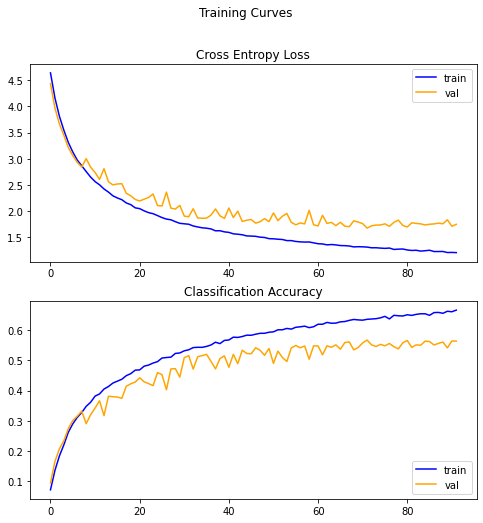


Test set evaluation metrics
---------------------------
Loss:     1.651
Accuracy: 56.250%


In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_40["SIMPLE_MODEL"] = fit_and_test_model(number_of_classes, SIMPLE_MODEL_OPTIMIZED, "Simple Model")

##### CNN1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)       

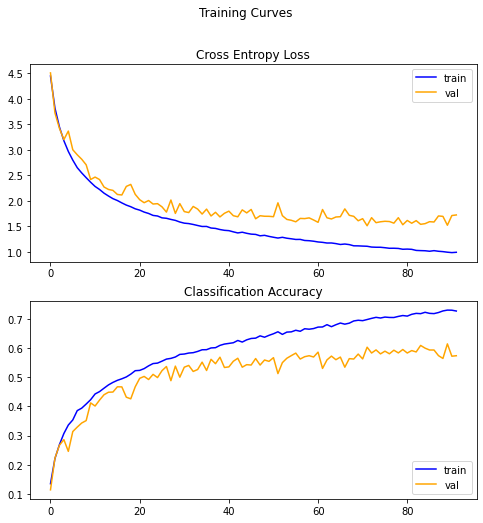


Test set evaluation metrics
---------------------------
Loss:     1.463
Accuracy: 61.775%


In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_40["CNN1"] = fit_and_test_model(number_of_classes, CNN1_MODEL_OPTIMIZED, "Cnn1")

##### CNN2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)       

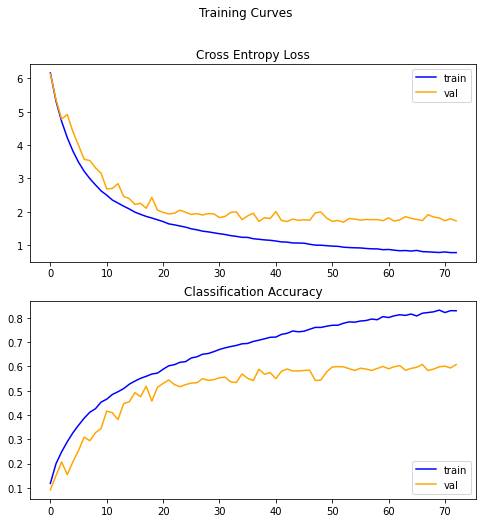


Test set evaluation metrics
---------------------------
Loss:     1.666
Accuracy: 60.900%


In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_40["CNN2"] = fit_and_test_model(number_of_classes, CNN2_MODEL_OPTIMIZED, "Cnn2")

#### Μεταφορά μάθησης

##### VGG16

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 40)                20520     
Total params: 14,735,208
Trainable params: 14,735,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
532/532 [==============================] - 12s 19ms/step - loss: 3.6165 - accuracy: 0.0705 - val_loss: 2.7216 - val_accuracy: 0.2842
Epoch 2/200
532/532 [==============================] - 10s 19ms/step - loss: 2.5322 - accuracy: 0

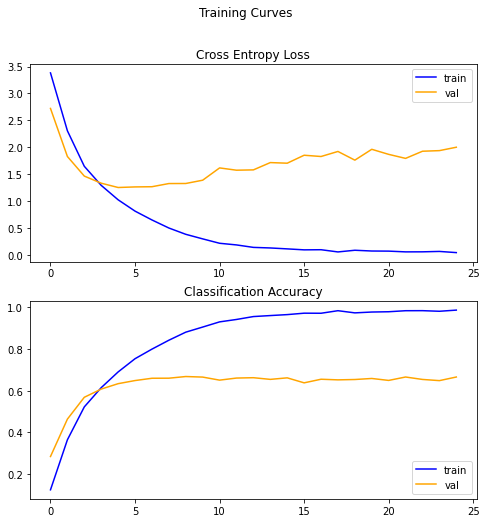


Test set evaluation metrics
---------------------------
Loss:     1.210
Accuracy: 63.825%


In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_40["VGG_ALL"] = fit_and_test_model(number_of_classes, VGG16_MODEL_OPTIMIZED, "VGG16")

##### MobileNet

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 40)                51240     
Total params: 2,309,224
Trainable params: 2,275,112
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
532/532 [==============================] - 123s 223ms/step - loss: 2.1427 - accuracy: 0.4335 - val_loss: 4.0282 - val_accuracy: 0.1835
Epoch 2/200
532/532 [======

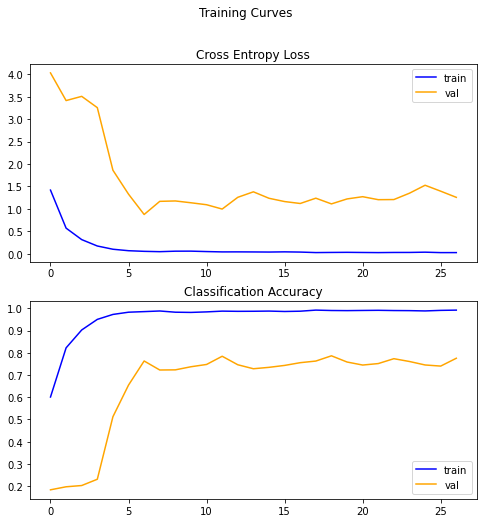


Test set evaluation metrics
---------------------------
Loss:     0.827
Accuracy: 77.800%


In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_40["MOBILENET_ALL"] = fit_and_test_model(number_of_classes, MobileNetV2_MODEL_OPTIMIZED, "MobileNet")

##### DenseNet

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 40)                41000     
Total params: 7,078,504
Trainable params: 6,994,856
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
532/532 [==============================] - 28s 34ms/step - loss: 4.0595 - accuracy: 0.1080 - val_loss: 2.4473 - val_accuracy: 0.4102
Epoch 2/200
532/532 [==============================] - 17s 31ms/step - loss: 2.2613 - accura

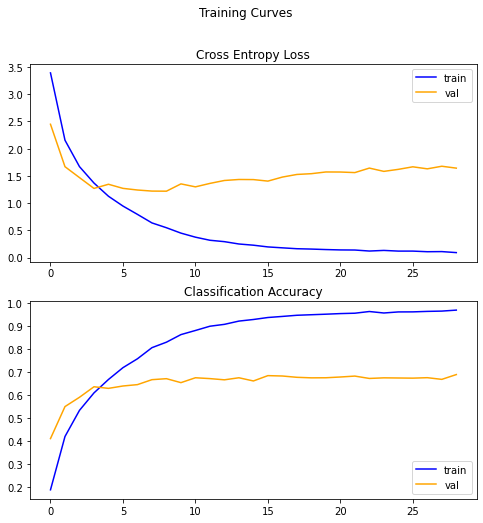


Test set evaluation metrics
---------------------------
Loss:     1.245
Accuracy: 66.450%


In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_40["DENSENET_ALL"] = fit_and_test_model(number_of_classes, DENSENET_MODEL_OPTIMIZED, "DenseNet")

### Αριθμός κλάσεων = 60

#### Δίκτυα "from scratch"

In [ ]:
# Number of classes
number_of_classes = 60

accuracies_opt_60 = {}

##### Simple CNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        2

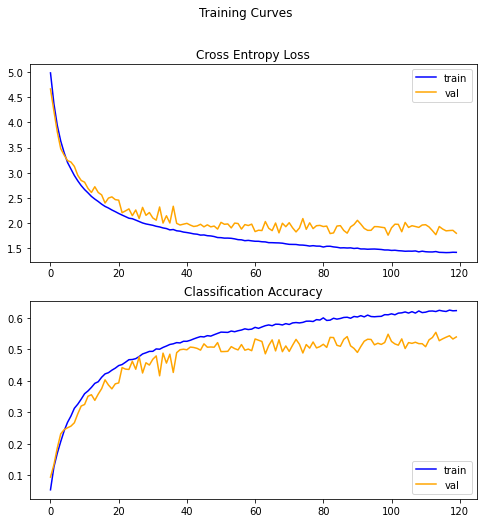


Test set evaluation metrics
---------------------------
Loss:     1.734
Accuracy: 55.552%


In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_60["SIMPLE_MODEL"] = fit_and_test_model(number_of_classes, SIMPLE_MODEL_OPTIMIZED, "Simple Model")

##### CNN1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)       

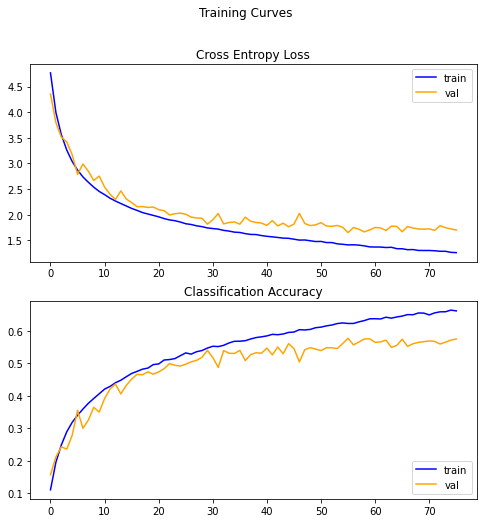


Test set evaluation metrics
---------------------------
Loss:     1.646
Accuracy: 57.596%


In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_60["CNN1"] = fit_and_test_model(number_of_classes, CNN1_MODEL_OPTIMIZED, "Cnn1")

##### CNN2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)       

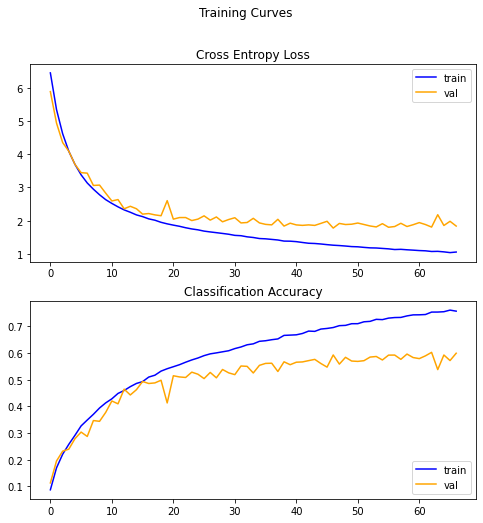


Test set evaluation metrics
---------------------------
Loss:     1.757
Accuracy: 59.508%


In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_60["CNN2"] = fit_and_test_model(number_of_classes, CNN2_MODEL_OPTIMIZED, "Cnn2")

#### Μεταφορά μάθησης

##### VGG16

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 60)                30780     
Total params: 14,745,468
Trainable params: 14,745,468
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
797/797 [==============================] - 16s 19ms/step - loss: 4.0758 - accuracy: 0.0301 - val_loss: 3.3412 - val_accuracy: 0.1784
Epoch 2/200
797/797 [==============================] - 15s 18ms/step - loss: 3.1486 - accuracy:

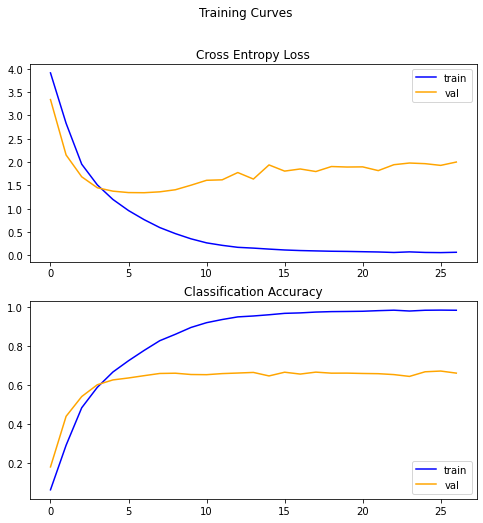


Test set evaluation metrics
---------------------------
Loss:     1.352
Accuracy: 63.331%


In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_60["VGG_ALL"] = fit_and_test_model(number_of_classes, VGG16_MODEL_OPTIMIZED, "VGG16")

##### MobileNet

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 60)                76860     
Total params: 2,334,844
Trainable params: 2,300,732
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
797/797 [==============================] - 145s 177ms/step - loss: 2.3800 - accuracy: 0.4179 - val_loss: 3.3219 - val_accuracy: 0.2398
Epoch 2/200
797/797 [======

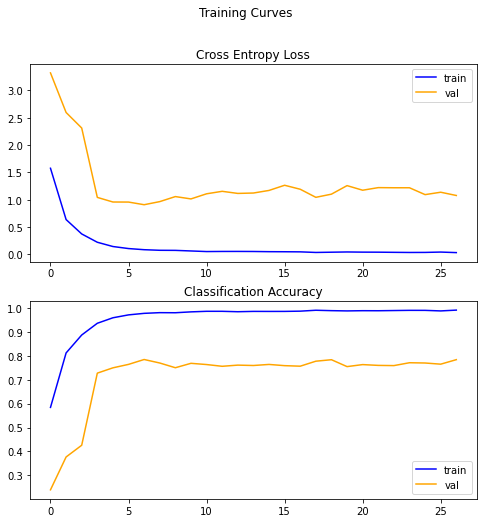


Test set evaluation metrics
---------------------------
Loss:     0.902
Accuracy: 77.693%


In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_60["MOBILENET_ALL"] = fit_and_test_model(number_of_classes, MobileNetV2_MODEL_OPTIMIZED, "MobileNet")

##### DenseNet

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 60)                61500     
Total params: 7,099,004
Trainable params: 7,015,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
797/797 [==============================] - 37s 35ms/step - loss: 4.4054 - accuracy: 0.0824 - val_loss: 2.3670 - val_accuracy: 0.4005
Epoch 2/200
797/797 [======

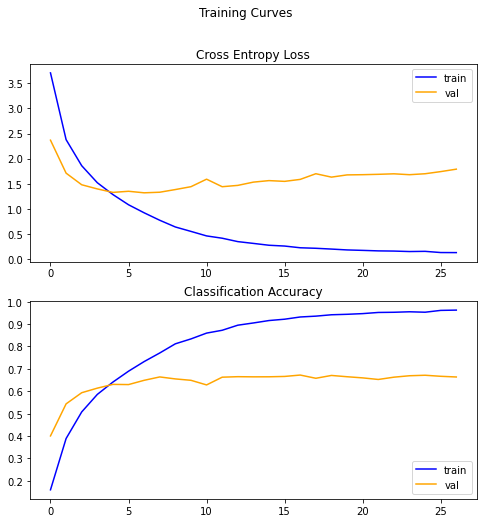


Test set evaluation metrics
---------------------------
Loss:     1.300
Accuracy: 64.777%


In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_60["DENSENET_ALL"] = fit_and_test_model(number_of_classes, DENSENET_MODEL_OPTIMIZED, "DenseNet")

### Αριθμός κλάσεων = 80

#### Δίκτυα "from scratch"

In [ ]:
# Number of classes
number_of_classes = 80

accuracies_opt_80 = {}

##### Simple CNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        2

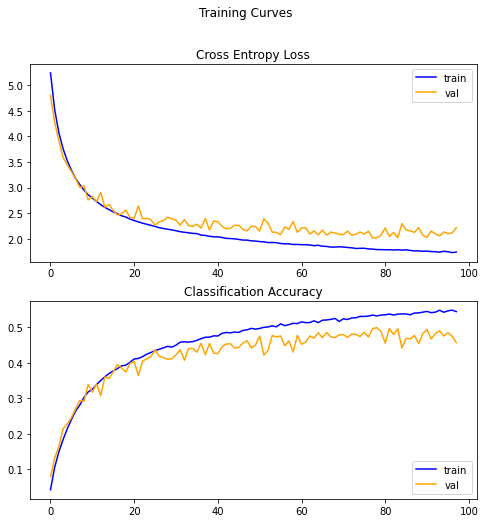


Test set evaluation metrics
---------------------------
Loss:     1.967
Accuracy: 50.037%


In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_80["SIMPLE_MODEL"] = fit_and_test_model(number_of_classes, SIMPLE_MODEL_OPTIMIZED, "Simple Model")

##### CNN1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)       

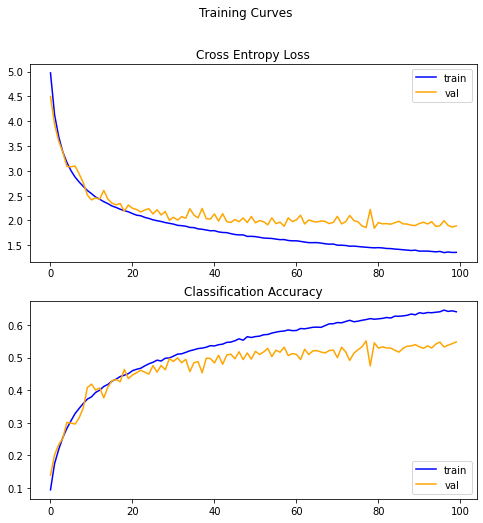


Test set evaluation metrics
---------------------------
Loss:     1.797
Accuracy: 55.275%


In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_80["CNN1"] = fit_and_test_model(number_of_classes, CNN1_MODEL_OPTIMIZED, "Cnn1")

##### CNN2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)       

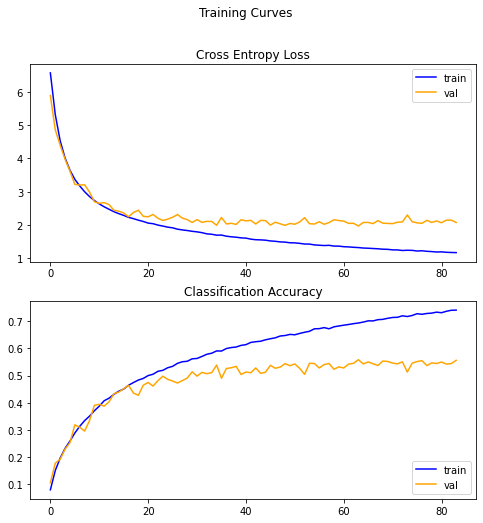


Test set evaluation metrics
---------------------------
Loss:     1.924
Accuracy: 56.925%


In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True, classes_num = number_of_classes)
accuracies_opt_80["CNN2"] = fit_and_test_model(number_of_classes, CNN2_MODEL_OPTIMIZED, "Cnn2")

#### Μεταφορά μάθησης

##### VGG16

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 80)                41040     
Total params: 14,755,728
Trainable params: 14,755,728
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1063/1063 [==============================] - 39s 30ms/step - loss: 4.2591 - accuracy: 0.0446 - val_loss: 3.0785 - val_accuracy: 0.2601
Epoch 2/200
1063/1063 [=======

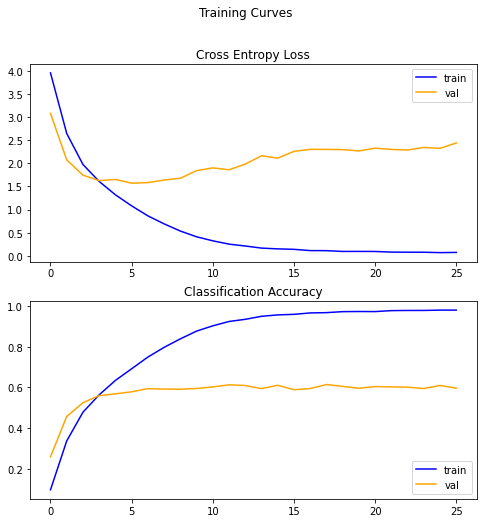


Test set evaluation metrics
---------------------------
Loss:     1.547
Accuracy: 58.613%


In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_80["VGG_ALL"] = fit_and_test_model(number_of_classes, VGG16_MODEL_OPTIMIZED, "VGG16")

##### MobileNet

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                102480    
Total params: 2,360,464
Trainable params: 2,326,352
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
1063/1063 [==============================] - 194s 179ms/step - loss: 2.5463 - accuracy: 0.3868 - val_loss: 3.3312 - val_accuracy: 0.2663
Epoch 2/200
1063/1063 [==============================] - 186s 175ms/step - loss: 0.7990 

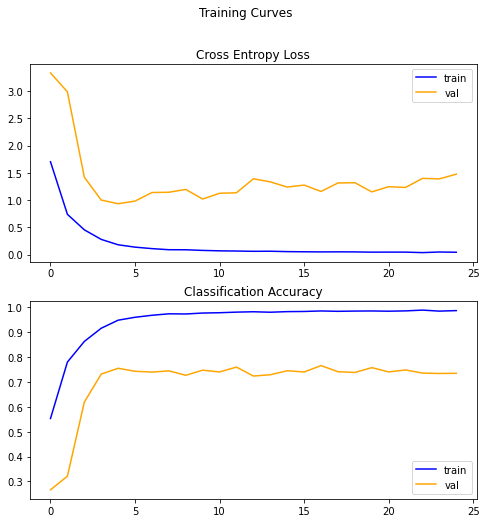


Test set evaluation metrics
---------------------------
Loss:     0.915
Accuracy: 75.600%


In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_80["MOBILENET_ALL"] = fit_and_test_model(number_of_classes, MobileNetV2_MODEL_OPTIMIZED, "MobileNet")

##### DenseNet

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 80)                82000     
Total params: 7,119,504
Trainable params: 7,035,856
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
1063/1063 [==============================] - 46s 35ms/step - loss: 4.6690 - accuracy: 0.0708 - val_loss: 2.5858 - val_accuracy: 0.3620
Epoch 2/200
1063/1063 [==============================] - 36s 34ms/step - loss: 2.8120 - ac

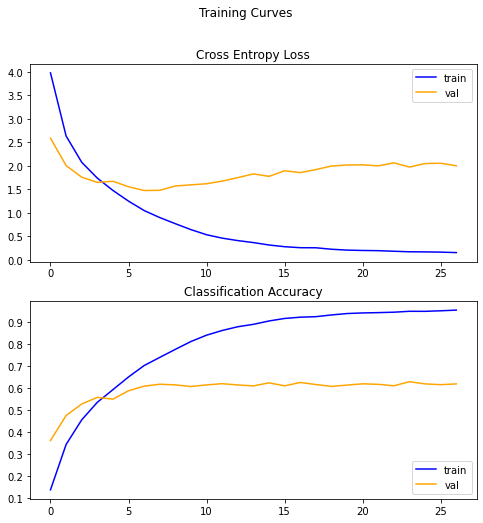


Test set evaluation metrics
---------------------------
Loss:     1.443
Accuracy: 61.387%


In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True, classes_num = number_of_classes)
accuracies_opt_80["DENSENET_ALL"] = fit_and_test_model(number_of_classes, DENSENET_MODEL_OPTIMIZED, "DenseNet")

### Σύγκριση χρόνων εκπαίδευσης βέλτιστων ταξινομητών 

Τυπώνουμε τώρα σε φθίνουσα σειρά τους χρόνους εκπαίδευσης των βελτιστοποιημένων μοντέλων για 80 κλάσεις. 

In [ ]:
print("\033[1mFit times of Optimal Classifiers for 80 Classes:\n")
print("------------------------ fit times ------------------------\n")
sorted_fit_times = [(k, fit_times[k]) for k in sorted(fit_times, key=fit_times.get, reverse=True)]
for k, v in sorted_fit_times:
    hours, mins, secs = str(datetime.timedelta(seconds=v)).split(":")
    if int(hours)==0:
       print("\033[1m",k,":","\033[0m{} mins {} secs".format(mins.lstrip("0"),np.round(float(secs))))
    else:
       print("\033[1m",k,":","\033[0m{} h {} mins {} secs".format(hours.lstrip("0"),mins.lstrip("0"),np.round(float(secs))))
print()

Fit times of Optimal Classifiers for 80 Classes:

------------------------ fit times ------------------------

 MobileNet : 1 h 18 mins 22.0 secs
 DenseNet : 16 mins 14.0 secs
 VGG16 : 14 mins 7.0 secs
 Cnn2 : 7 mins 25.0 secs
 Cnn1 : 7 mins 16.0 secs
 Simple Model : 6 mins 53.0 secs



Παρατηρούμε πως τα Transfer Learning μοντέλα έχουν γενικά υψηλότερους χρόνους εκπαίδευσης από τα from scratch. Το γεγονός αυτό είναι αναμενόμενο καθώς τα μοντέλα αυτά έχουν αισθητά μεγαλύτερο αριθμό παραμέτρων προς εκπαίδευση. 

### Bar plots σύγκρισης

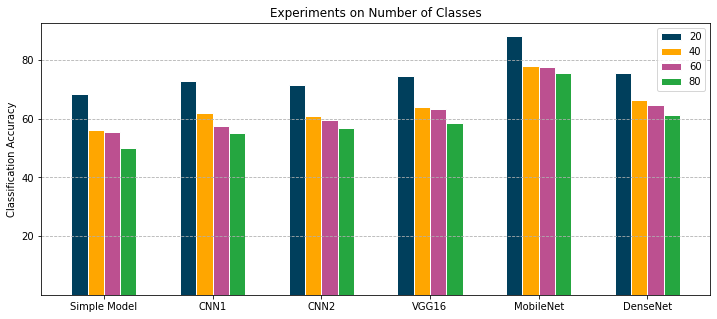

In [ ]:
# set width of bar
barWidth = 0.15
model_names = ['Simple Model', 'CNN1', 'CNN2', 'VGG16', 'MobileNet', 'DenseNet']

# set height of bars
bar1 = [accuracies_opt["SIMPLE_MODEL"],accuracies_opt["CNN1"],accuracies_opt["CNN2"],accuracies_opt["VGG_ALL"],accuracies_opt["MOBILENET_ALL"],accuracies_opt["DENSENET_ALL"]]
bar2 = [accuracies_opt_40["SIMPLE_MODEL"],accuracies_opt_40["CNN1"],accuracies_opt_40["CNN2"],accuracies_opt_40["VGG_ALL"],accuracies_opt_40["MOBILENET_ALL"],accuracies_opt_40["DENSENET_ALL"]]
bar3 = [accuracies_opt_60["SIMPLE_MODEL"],accuracies_opt_60["CNN1"],accuracies_opt_60["CNN2"],accuracies_opt_60["VGG_ALL"],accuracies_opt_60["MOBILENET_ALL"],accuracies_opt_60["DENSENET_ALL"]]
bar4 = [accuracies_opt_80["SIMPLE_MODEL"],accuracies_opt_80["CNN1"],accuracies_opt_80["CNN2"],accuracies_opt_80["VGG_ALL"],accuracies_opt_80["MOBILENET_ALL"],accuracies_opt_80["DENSENET_ALL"]]

# Set position of bar on X axis
r1 = np.arange(6)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.figure(figsize=(12,5))
plt.bar(r1, bar1, color='#003f5c', width=barWidth, edgecolor='white', label = '20')
plt.bar(r2, bar2, color='#ffa600', width=barWidth, edgecolor='white', label = '40')
plt.bar(r3, bar3, color='#bc5090', width=barWidth, edgecolor='white', label = '60')
plt.bar(r4, bar4, color='#25A640', width=barWidth, edgecolor='white', label = '80')
plt.xticks([r + 1.5*barWidth for r in range(6)], model_names)
plt.ylim(bottom=0.1)
plt.legend(loc='best')
plt.title("Experiments on Number of Classes")
plt.ylabel("Classification Accuracy")
plt.grid(axis="y", linestyle="--")
plt.show()

Παρατηρούμε πως **όσο αυξάνεται ο αριθμός των κλάσεων (και παράλληλα και τα δεδομένα μας) η ακρίβεια κατηγοριοποίησης μειώνεται**, γεγονός αναμενόμενο καθώς έχουμε να αντιμετώπισουμε ένα αρκετά πιο δύσκολο πρόβλημα κατηγοριοποίησης. Παρατηρούμε λοιπόν πως για το υποπρόβλημα των 20 κλάσεων, ακόμα και τα from scratch μοντέλα που υλοποιούμε, επιτυγχάνουν ποσοστό ακρίβειας γύρω στο 70% (τα μοντέλα CNN1 και CNN2 μάλιστα το υπερβαίνουν). Αντίστοιχα, με χρήση μεταφοράς μάθησης, βλέπουμε πως λαμβάνουμε ποσοστό ορθής κατηγοριοποίησης κοντά στο 90% (MobileNet). Τα νούμερα αυτά φθείνουν καθώς προχωράμε σε μεγαλύτερο αριθμό κλάσεων. Συγκεκριμένα, υπάρχει μια αισθητή πτώση στην απόδοση, της τάξης του 10%, καθώς οι κλάσεις διπλασιάζονται και από 20 γίνονται 40. Για περαιτέρω αύξηση του πλήθους των κλάσεων, η μείωση της απόδοσης είναι μικρότερη. Αυτό καταδεικνύει την κλιμακωσιμότητα (scalability) των μοντέλων μας, τα οποία προσαρμόζονται επιτυχημένα στην αύξηση του όγκου των δεδομένων. Αξίζει να σημειωθεί πως για το πρόβλημα των 80 κλάσεων, με χρήση του pretrained δικτύου MobileNet και με εκπαίδευση όλων των επιπέδων του, λαμβάνουμε ακρίβεια στα test δεδομένα η οποία υπερβαίνει το 75%, ποσοστό αρκετά υψηλό αν αναλογιστεί κανείς τη δυσκολία του συγκεκριμένου classification task.

## **Επίδραση της απόδοσης με μεταβολή του αριθμού του batch size**

Μέχρι στιγμής εκπαιδεύαμε τα μοντέλα μας με batch size ίσο με 32. Δοκιμάζουμε τώρα να εκπαιδεύσουμε τα βελτιστοποιημένα μοντέλα μας με batch size 64, 128 και 200, ώστε να δούμε πως η αύξηση αυτή επηρεάζει την ακρίβεια των μοντέλων (test accuracy). Ο αριθμός των κλάσεων διατηρείται σταθερός και ίσος με 20.

### Batch size = 64

In [ ]:
# Number of classes
num_of_classes = 20

# select the number of classes
cifar100_classes_url = select_classes_number(num_of_classes)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
print(our_index)
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

[1, 6, 9, 19, 25, 26, 27, 29, 32, 33, 39, 42, 53, 68, 79, 86, 87, 88, 91, 98]


In [ ]:
# print our classes
print(our_classes)

[' aquarium_fish', ' bee', ' bottle', ' cattle', ' couch', ' crab', ' crocodile', ' dinosaur', ' flatfish', ' forest', ' keyboard', ' leopard', ' orange', ' road', ' spider', ' telephone', ' television', ' tiger', ' trout', ' woman']


In [ ]:
CLASSES_NUM=len(our_classes)
print(CLASSES_NUM)

20


In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

In [ ]:
y_train = create_new_labels(our_index,y_train)
y_val = create_new_labels(our_index,y_val)
y_test = create_new_labels(our_index,y_test)

In [ ]:
BATCH_SIZE = 64

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

train_ds_res = train_ds.map(resize_transform)
validation_ds_res = validation_ds.map(resize_transform)
test_ds_res = test_ds.map(resize_transform)

def train_model(model, train_dataset = train_ds, validation_dataset = validation_ds, epochs = 100, callbacks = None, steps_per_epoch = int(np.ceil(x_train.shape[0]/BATCH_SIZE)), validation_steps = int(np.ceil(x_val.shape[0]/BATCH_SIZE))):
  history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_dataset, validation_steps=validation_steps, callbacks=callbacks)
  return(history)

def model_report(model, history, evaluation_dataset = test_ds, evaluation_steps = int(np.ceil(x_test.shape[0]/BATCH_SIZE))):
      plt = summarize_diagnostics(history)
      plt.show()
      return model_evaluation(model, evaluation_dataset, evaluation_steps)

#### Δίκτυα "from scratch"

In [ ]:
accuracies_opt_64 = {}

##### Simple CNN

In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True)
SIMPLE_MODEL_OPTIMIZED_history = train_model(SIMPLE_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        2

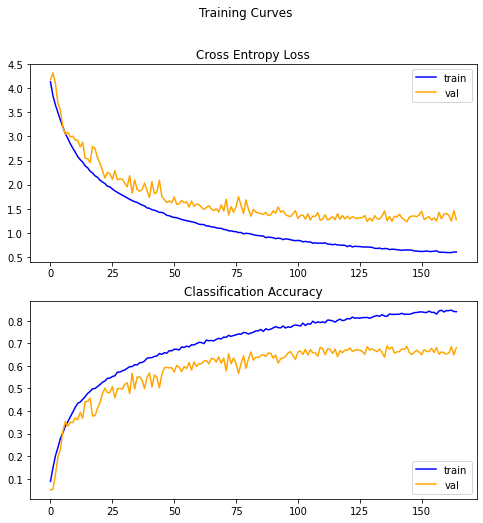


Test set evaluation metrics
---------------------------
Loss:     1.257
Accuracy: 67.725%


In [ ]:
_, accuracy = model_report(SIMPLE_MODEL_OPTIMIZED, SIMPLE_MODEL_OPTIMIZED_history)
accuracies_opt_64["SIMPLE_MODEL"] = accuracy

##### CNN1

In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True)
CNN1_MODEL_OPTIMIZED_history = train_model(CNN1_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)       

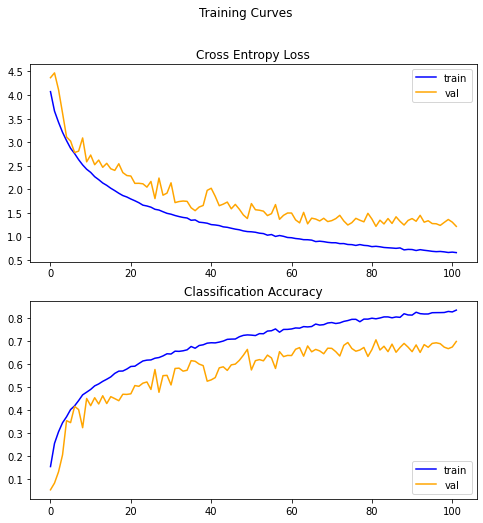


Test set evaluation metrics
---------------------------
Loss:     1.226
Accuracy: 67.676%


In [ ]:
_, accuracy = model_report(CNN1_MODEL_OPTIMIZED, CNN1_MODEL_OPTIMIZED_history)
accuracies_opt_64["CNN1"] = accuracy

##### CNN2

In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True)
CNN2_MODEL_OPTIMIZED_history = train_model(CNN2_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)       

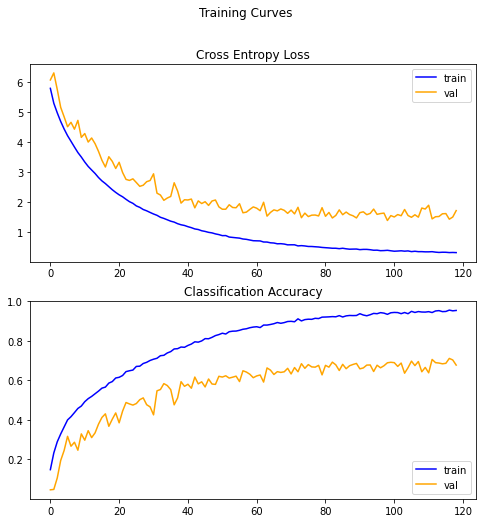


Test set evaluation metrics
---------------------------
Loss:     1.372
Accuracy: 70.264%


In [ ]:
_, accuracy = model_report(CNN2_MODEL_OPTIMIZED, CNN2_MODEL_OPTIMIZED_history)
accuracies_opt_64["CNN2"] = accuracy

#### Μεταφορά μάθησης

##### VGG16

In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True)
VGG16_MODEL_OPTIMIZED_history = train_model(VGG16_MODEL_OPTIMIZED, epochs = 200, callbacks = [callback])

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
133/133 [==============================] - 4s 25ms/step - loss: 2.6305 - accuracy: 0.2193 - val_loss: 1.3691 - val_accuracy: 0.5918
Epoch 2/200
133/133 [==========

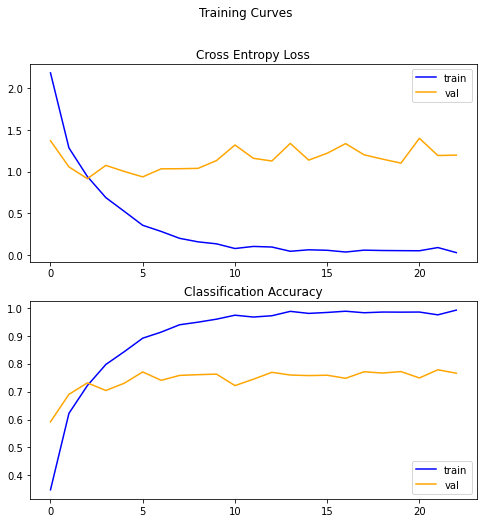


Test set evaluation metrics
---------------------------
Loss:     0.885
Accuracy: 74.170%


In [ ]:
_, accuracy = model_report(VGG16_MODEL_OPTIMIZED, VGG16_MODEL_OPTIMIZED_history)
accuracies_opt_64["VGG_ALL"] = accuracy

##### MobileNet

In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True)
MobileNetV2_MODEL_OPTIMIZED_history = train_model(MobileNetV2_MODEL_OPTIMIZED, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks=[callback])

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
133/133 [==============================] - 50s 349ms/step - loss: 1.8738 - accuracy: 0.4690 - val_loss: 2.5203 - val_accuracy: 0.3874
Epoch 2/200
133/133 [=======

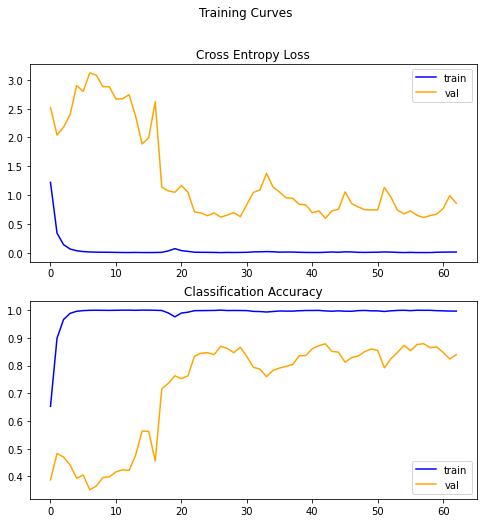


Test set evaluation metrics
---------------------------
Loss:     0.627
Accuracy: 88.086%


In [ ]:
_, accuracy = model_report(MobileNetV2_MODEL_OPTIMIZED, MobileNetV2_MODEL_OPTIMIZED_history, test_ds_res)
accuracies_opt_64["MOBILENET_ALL"] = accuracy

##### DenseNet

In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True)
DENSENET_MODEL_OPTIMIZED_history = train_model(DENSENET_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
133/133 [==============================] - 16s 51ms/step - loss: 3.6407 - accuracy: 0.1197 - val_loss: 2.1637 - val_accuracy: 0.3854
Epoch 2/200
133/133 [======

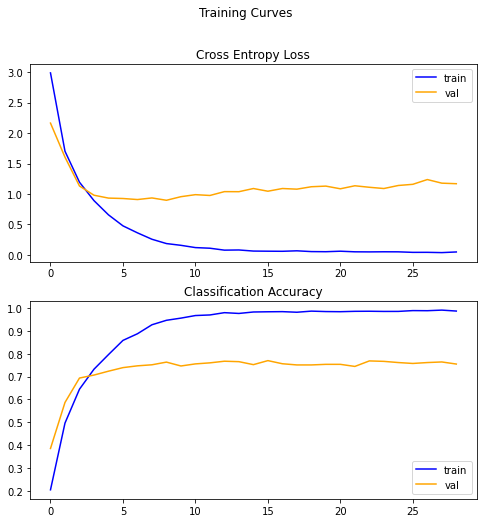


Test set evaluation metrics
---------------------------
Loss:     0.917
Accuracy: 75.977%


In [ ]:
_, accuracy = model_report(DENSENET_MODEL_OPTIMIZED, DENSENET_MODEL_OPTIMIZED_history)
accuracies_opt_64["DENSENET_ALL"] = accuracy

### Batch size = 128

In [ ]:
BATCH_SIZE = 128

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

train_ds_res = train_ds.map(resize_transform)
validation_ds_res = validation_ds.map(resize_transform)
test_ds_res = test_ds.map(resize_transform)

def train_model(model, train_dataset = train_ds, validation_dataset = validation_ds, epochs = 100, callbacks = None, steps_per_epoch = int(np.ceil(x_train.shape[0]/BATCH_SIZE)), validation_steps = int(np.ceil(x_val.shape[0]/BATCH_SIZE))):
  history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_dataset, validation_steps=validation_steps, callbacks=callbacks)
  return(history)

def model_report(model, history, evaluation_dataset = test_ds, evaluation_steps = int(np.ceil(x_test.shape[0]/BATCH_SIZE))):
      plt = summarize_diagnostics(history)
      plt.show()
      return model_evaluation(model, evaluation_dataset, evaluation_steps)

#### Δίκτυα "from scratch"

In [ ]:
accuracies_opt_128 = {}

##### Simple CNN

In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True)
SIMPLE_MODEL_OPTIMIZED_history = train_model(SIMPLE_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_10 (ReLU)              (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 13, 13, 64)       

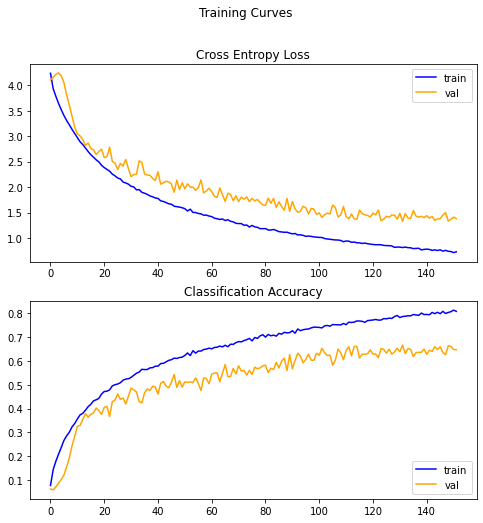


Test set evaluation metrics
---------------------------
Loss:     1.342
Accuracy: 65.820%


In [ ]:
_, accuracy = model_report(SIMPLE_MODEL_OPTIMIZED, SIMPLE_MODEL_OPTIMIZED_history)
accuracies_opt_128["SIMPLE_MODEL"] = accuracy

##### CNN1

In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True)
CNN1_MODEL_OPTIMIZED_history = train_model(CNN1_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 13, 13, 64)       

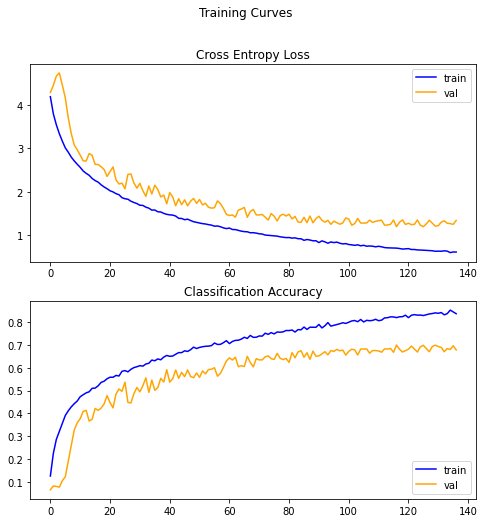


Test set evaluation metrics
---------------------------
Loss:     1.161
Accuracy: 71.387%


In [ ]:
_, accuracy = model_report(CNN1_MODEL_OPTIMIZED, CNN1_MODEL_OPTIMIZED_history)
accuracies_opt_128["CNN1"] = accuracy

##### CNN2

In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True)
CNN2_MODEL_OPTIMIZED_history = train_model(CNN2_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_16 (ReLU)              (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 64)       

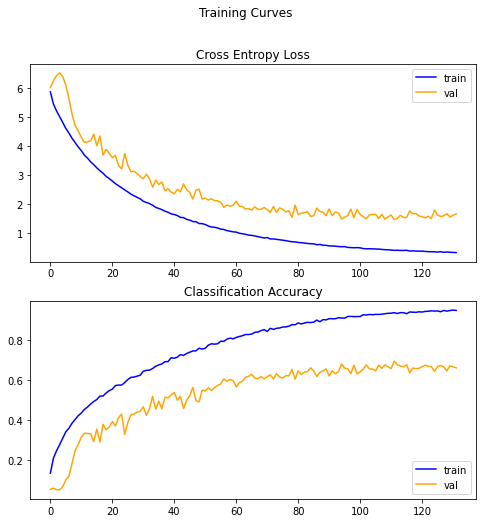


Test set evaluation metrics
---------------------------
Loss:     1.492
Accuracy: 67.725%


In [ ]:
_, accuracy = model_report(CNN2_MODEL_OPTIMIZED, CNN2_MODEL_OPTIMIZED_history)
accuracies_opt_128["CNN2"] = accuracy

#### Μεταφορά μάθησης

##### VGG16

In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True)
VGG16_MODEL_OPTIMIZED_history = train_model(VGG16_MODEL_OPTIMIZED, epochs = 200, callbacks = [callback])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_27 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
67/67 [==============================] - 4s 37ms/step - loss: 2.7964 - accuracy: 0.1588 - val_loss: 1.6078 - val_accuracy: 0.5234
Epoch 2/200
67/67 [==============================] - 2s 35ms/step - loss: 1.5624 - accuracy: 0.533

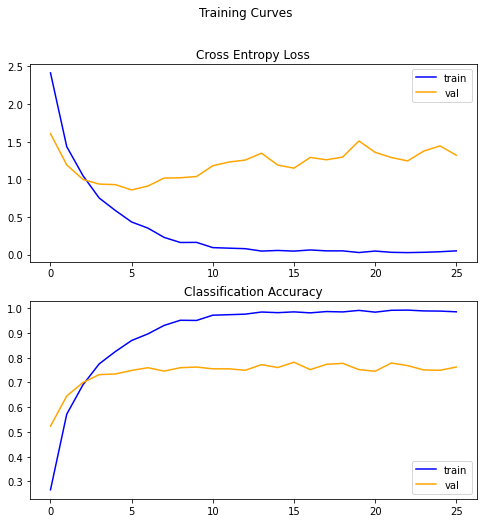


Test set evaluation metrics
---------------------------
Loss:     0.829
Accuracy: 76.025%


In [ ]:
_, accuracy = model_report(VGG16_MODEL_OPTIMIZED, VGG16_MODEL_OPTIMIZED_history)
accuracies_opt_128["VGG_ALL"] = accuracy

##### MobileNet

In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True)
MobileNetV2_MODEL_OPTIMIZED_history = train_model(MobileNetV2_MODEL_OPTIMIZED, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
67/67 [==============================] - 67s 901ms/step - loss: 2.2048 - accuracy: 0.3828 - val_loss: 2.6248 - val_accuracy: 0.4173
Epoch 2/200
67/67 [==============================] - 59s 879ms/step - loss: 0.4699 - accuracy: 

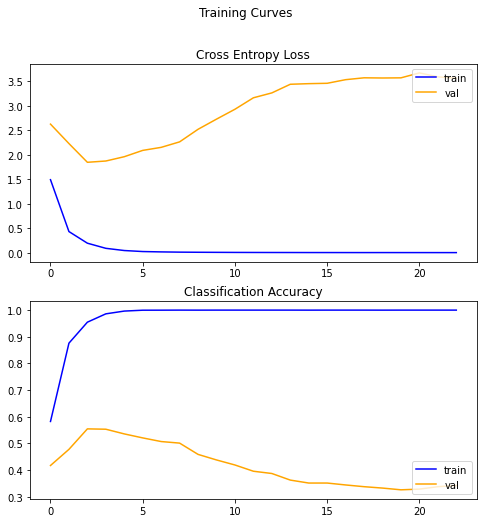


Test set evaluation metrics
---------------------------
Loss:     1.929
Accuracy: 53.613%


In [ ]:
_, accuracy = model_report(MobileNetV2_MODEL_OPTIMIZED, MobileNetV2_MODEL_OPTIMIZED_history, test_ds_res)
accuracies_opt_128["MOBILENET_ALL"] = accuracy

##### DenseNet

In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True)
DENSENET_MODEL_OPTIMIZED_history = train_model(DENSENET_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_29 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
67/67 [==============================] - 15s 74ms/step - loss: 3.8231 - accuracy: 0.1097 - val_loss: 2.5018 - val_accuracy: 0.2845
Epoch 2/200
67/67 [==============================] - 3s 51ms/step - loss: 2.1188 - accuracy: 

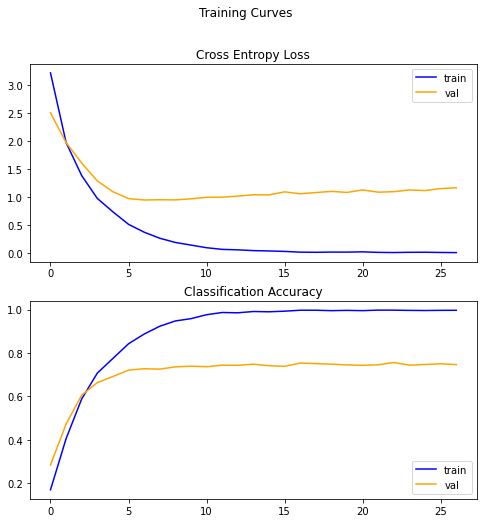


Test set evaluation metrics
---------------------------
Loss:     0.985
Accuracy: 72.168%


In [ ]:
_, accuracy = model_report(DENSENET_MODEL_OPTIMIZED, DENSENET_MODEL_OPTIMIZED_history)
accuracies_opt_128["DENSENET_ALL"] = accuracy

### Batch size = 200

In [ ]:
BATCH_SIZE = 200

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

train_ds_res = train_ds.map(resize_transform)
validation_ds_res = validation_ds.map(resize_transform)
test_ds_res = test_ds.map(resize_transform)

def train_model(model, train_dataset = train_ds, validation_dataset = validation_ds, epochs = 100, callbacks = None, steps_per_epoch = int(np.ceil(x_train.shape[0]/BATCH_SIZE)), validation_steps = int(np.ceil(x_val.shape[0]/BATCH_SIZE))):
  history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_dataset, validation_steps=validation_steps, callbacks=callbacks)
  return(history)

def model_report(model, history, evaluation_dataset = test_ds, evaluation_steps = int(np.ceil(x_test.shape[0]/BATCH_SIZE))):
      plt = summarize_diagnostics(history)
      plt.show()
      return model_evaluation(model, evaluation_dataset, evaluation_steps)

#### Δίκτυα "from scratch"

In [ ]:
accuracies_opt_200 = {}

##### Simple CNN

In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True)
SIMPLE_MODEL_OPTIMIZED_history = train_model(SIMPLE_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_20 (ReLU)              (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_21 (Batc (None, 13, 13, 64)      

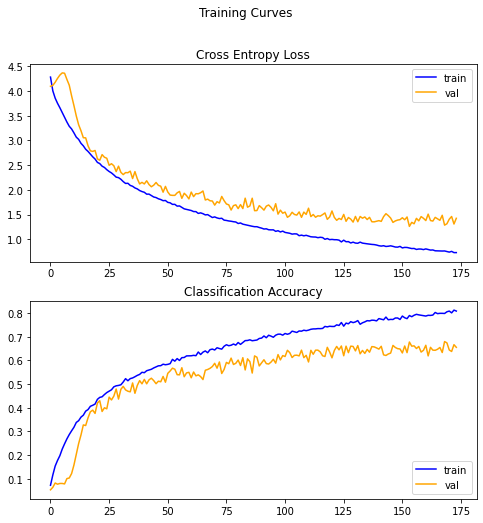


Test set evaluation metrics
---------------------------
Loss:     1.285
Accuracy: 66.500%


In [ ]:
_, accuracy = model_report(SIMPLE_MODEL_OPTIMIZED, SIMPLE_MODEL_OPTIMIZED_history)
accuracies_opt_200["SIMPLE_MODEL"] = accuracy

##### CNN1

In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True)
CNN1_MODEL_OPTIMIZED_history = train_model(CNN1_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_23 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_23 (ReLU)              (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_24 (Batc (None, 13, 13, 64)      

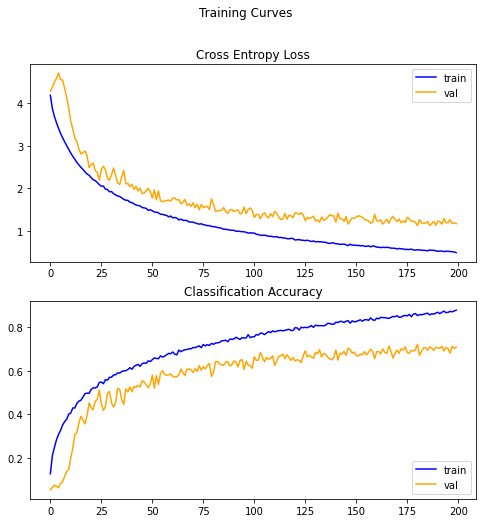


Test set evaluation metrics
---------------------------
Loss:     1.208
Accuracy: 71.050%


In [ ]:
_, accuracy = model_report(CNN1_MODEL_OPTIMIZED, CNN1_MODEL_OPTIMIZED_history)
accuracies_opt_200["CNN1"] = accuracy

##### CNN2

In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True)
CNN2_MODEL_OPTIMIZED_history = train_model(CNN2_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_26 (ReLU)              (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_27 (Batc (None, 16, 16, 64)      

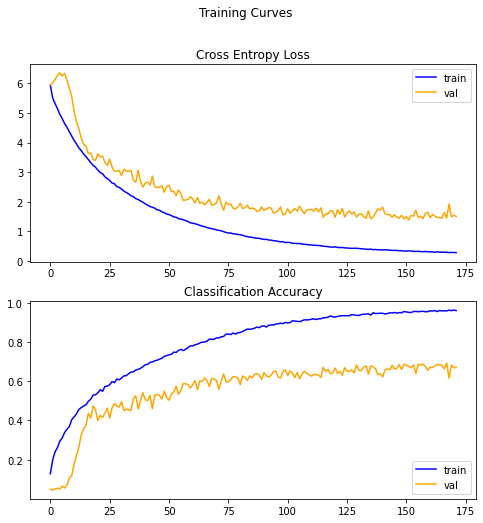


Test set evaluation metrics
---------------------------
Loss:     1.352
Accuracy: 70.600%


In [ ]:
_, accuracy = model_report(CNN2_MODEL_OPTIMIZED, CNN2_MODEL_OPTIMIZED_history)
accuracies_opt_200["CNN2"] = accuracy

#### Μεταφορά μάθησης

##### VGG16

In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True)
VGG16_MODEL_OPTIMIZED_history = train_model(VGG16_MODEL_OPTIMIZED, epochs = 200, callbacks = [callback])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_42 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_6 ( (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
43/43 [==============================] - 4s 54ms/step - loss: 2.7066 - accuracy: 0.1956 - val_loss: 1.4306 - val_accuracy: 0.5788
Epoch 2/200
43/43 [==============================] - 2s 50ms/step - loss: 1.5455 - accuracy: 0.54

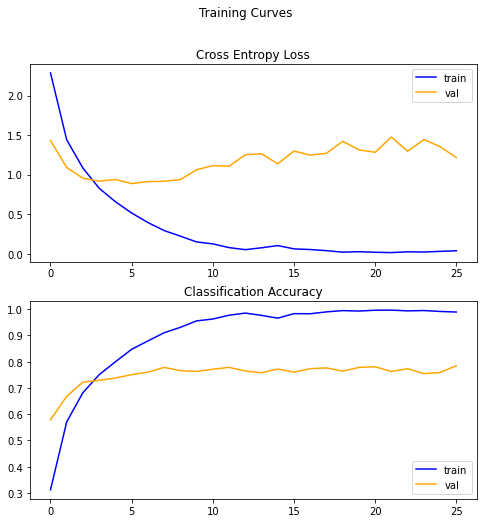


Test set evaluation metrics
---------------------------
Loss:     0.854
Accuracy: 75.900%


In [ ]:
_, accuracy = model_report(VGG16_MODEL_OPTIMIZED, VGG16_MODEL_OPTIMIZED_history)
accuracies_opt_200["VGG_ALL"] = accuracy

##### MobileNet

In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True)
MobileNetV2_MODEL_OPTIMIZED_history = train_model(MobileNetV2_MODEL_OPTIMIZED, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks=[callback])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_43 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1280)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
43/43 [==============================] - 51s 1s/step - loss: 2.3965 - accuracy: 0.3121 - val_loss: 2.4906 - val_accuracy: 0.3731
Epoch 2/200
43/43 [==============================] - 45s 1s/step - loss: 0.5952 - accuracy: 0.8

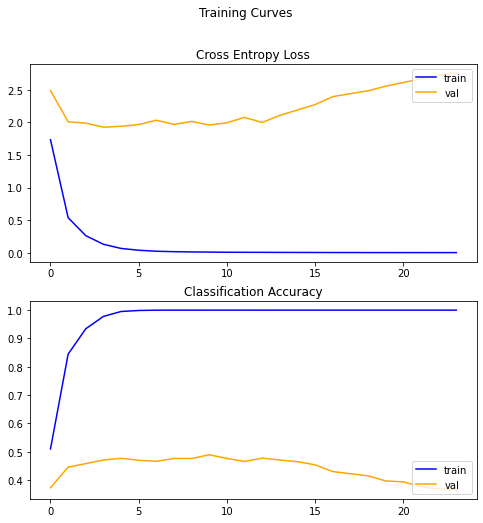


Test set evaluation metrics
---------------------------
Loss:     2.063
Accuracy: 45.950%


In [ ]:
_, accuracy = model_report(MobileNetV2_MODEL_OPTIMIZED, MobileNetV2_MODEL_OPTIMIZED_history, test_ds_res)
accuracies_opt_200["MOBILENET_ALL"] = accuracy

##### DenseNet

In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True)
DENSENET_MODEL_OPTIMIZED_history = train_model(DENSENET_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_44 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
43/43 [==============================] - 14s 98ms/step - loss: 3.8297 - accuracy: 0.0849 - val_loss: 2.7937 - val_accuracy: 0.1994
Epoch 2/200
43/43 [==============================] - 3s 64ms/step - loss: 2.3662 - accuracy: 

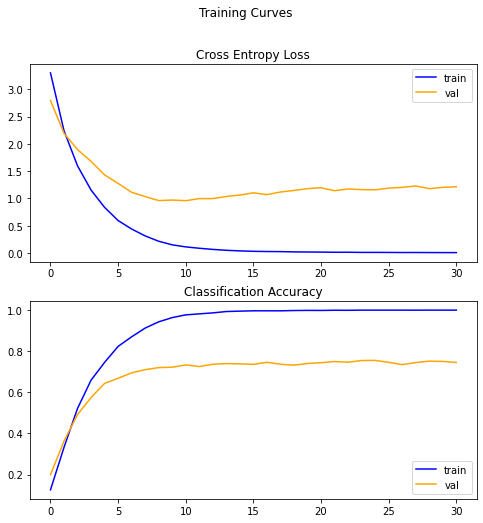


Test set evaluation metrics
---------------------------
Loss:     1.015
Accuracy: 71.750%


In [ ]:
_, accuracy = model_report(DENSENET_MODEL_OPTIMIZED, DENSENET_MODEL_OPTIMIZED_history)
accuracies_opt_200["DENSENET_ALL"] = accuracy

### Bar plots σύγκρισης

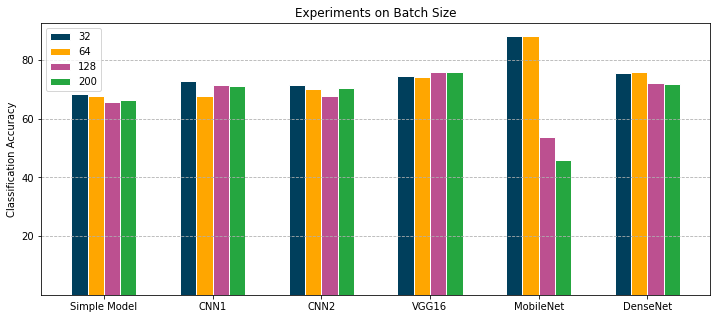

In [ ]:
# set width of bar
barWidth = 0.15
model_names = ['Simple Model', 'CNN1', 'CNN2', 'VGG16', 'MobileNet', 'DenseNet']

# set height of bars
bar1 = [accuracies_opt["SIMPLE_MODEL"],accuracies_opt["CNN1"],accuracies_opt["CNN2"],accuracies_opt["VGG_ALL"],accuracies_opt["MOBILENET_ALL"],accuracies_opt["DENSENET_ALL"]]
bar2 = [accuracies_opt_64["SIMPLE_MODEL"],accuracies_opt_64["CNN1"],accuracies_opt_64["CNN2"],accuracies_opt_64["VGG_ALL"],accuracies_opt_64["MOBILENET_ALL"],accuracies_opt_64["DENSENET_ALL"]]
bar3 = [accuracies_opt_128["SIMPLE_MODEL"],accuracies_opt_128["CNN1"],accuracies_opt_128["CNN2"],accuracies_opt_128["VGG_ALL"],accuracies_opt_128["MOBILENET_ALL"],accuracies_opt_128["DENSENET_ALL"]]
bar4 = [accuracies_opt_200["SIMPLE_MODEL"],accuracies_opt_200["CNN1"],accuracies_opt_200["CNN2"],accuracies_opt_200["VGG_ALL"],accuracies_opt_200["MOBILENET_ALL"],accuracies_opt_200["DENSENET_ALL"]]

# Set position of bar on X axis
r1 = np.arange(6)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.figure(figsize=(12,5))
plt.bar(r1, bar1, color='#003f5c', width=barWidth, edgecolor='white', label = '32')
plt.bar(r2, bar2, color='#ffa600', width=barWidth, edgecolor='white', label = '64')
plt.bar(r3, bar3, color='#bc5090', width=barWidth, edgecolor='white', label = '128')
plt.bar(r4, bar4, color='#25A640', width=barWidth, edgecolor='white', label = '200')
plt.xticks([r + 1.5*barWidth for r in range(6)], model_names)
plt.ylim(bottom=0.1)
plt.legend(loc='best')
plt.title("Experiments on Batch Size")
plt.ylabel("Classification Accuracy")
plt.grid(axis="y", linestyle="--")
plt.show()

Το **μέγεθος δέσμης (batch size)** εκφράζει το πλήθος των δειγμάτων του dataset που φορτώνονται μαζί σε κάποιο πέρασμα κατά την διαδικασία της εκπαίδευσης. Όσο μεγαλύτερη τιμή λαμβάνει τόσο μεγαλύτερη δέσμευση μνήμης απαιτείται. Αυξάνοντάς το από 32 σε 64, 128 και τέλος σε 200 παρατηρούμε ότι **η απόδοση των περισσότερων μοντέλων δεν επηρεάζεται σημαντικά**. Η μόνη αξιοσημείωτη διαφορά παρατηρείται στο δίκτυο MobileNet, το οποίο φαίνεται να εμφανίζει μεγάλη πτώση στην ακρίβεια κατηγοριοποίησης για μεγάλα μεγέθη (128 και 200). Επίσης, μπορούμε να διακρίνουμε πως τα καλύτερα ποσοστά προκύπτουν στην πλειοψηφία των περιπτώσεων για τις μικρότερες τιμές του batch size (32 και 64).

## **Επίδραση της απόδοσης με μεταβολή του αλγορίθμου βελτιστοποίησης (optimizer)**

Μέχρι στιγμής, η εκπαίδευση των δικτύων έγινε με χρήση του optimizer Adam. Πειραματιζόμαστε με διαφορετικούς αλγορίθμους βελτιστοποίησης (Nadam, SGD και RMSprop) ώστε να δούμε πως αυτοί επηρεάζουν την ακρίβεια των μοντέλων μας (test accuracy). Να σημειωθεί πως για τις ακόλουθες εκπαιδεύσεις διατηρούμε σταθερό batch size = 32, σταθερό αριθμό 20 κλάσεων, learning rate = 0.00005 και αριθμό εποχών ίσο με 200 (με χρήση Early stopping).

In [ ]:
BATCH_SIZE = 32

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

train_ds_res = train_ds.map(resize_transform)
validation_ds_res = validation_ds.map(resize_transform)
test_ds_res = test_ds.map(resize_transform)

def train_model(model, train_dataset = train_ds, validation_dataset = validation_ds, epochs = 100, callbacks = None, steps_per_epoch = int(np.ceil(x_train.shape[0]/BATCH_SIZE)), validation_steps = int(np.ceil(x_val.shape[0]/BATCH_SIZE))):
  history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_dataset, validation_steps=validation_steps, callbacks=callbacks)
  return(history)

def model_report(model, history, evaluation_dataset = test_ds, evaluation_steps = int(np.ceil(x_test.shape[0]/BATCH_SIZE))):
      plt = summarize_diagnostics(history)
      plt.show()
      return model_evaluation(model, evaluation_dataset, evaluation_steps)

### Nadam

#### Δίκτυα "from scratch"

In [ ]:
accuracies_opt_Nadam = {}

##### Simple CNN

In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True, optimizer = tf.optimizers.Nadam)
SIMPLE_MODEL_OPTIMIZED_history = train_model(SIMPLE_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)      

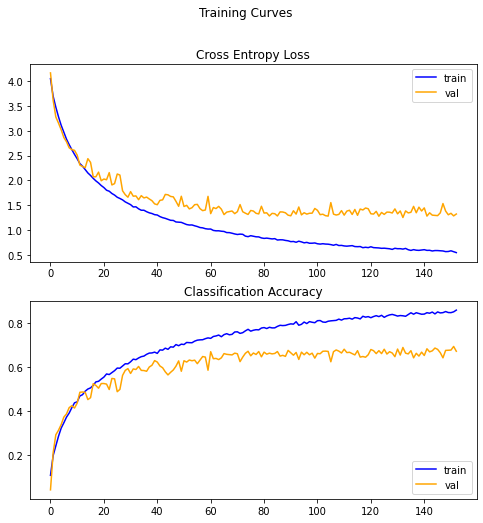


Test set evaluation metrics
---------------------------
Loss:     1.265
Accuracy: 70.040%


In [ ]:
_, accuracy = model_report(SIMPLE_MODEL_OPTIMIZED, SIMPLE_MODEL_OPTIMIZED_history)
accuracies_opt_Nadam["SIMPLE_MODEL"] = accuracy

##### CNN1

In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True, optimizer = tf.optimizers.Nadam)
CNN1_MODEL_OPTIMIZED_history = train_model(CNN1_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)      

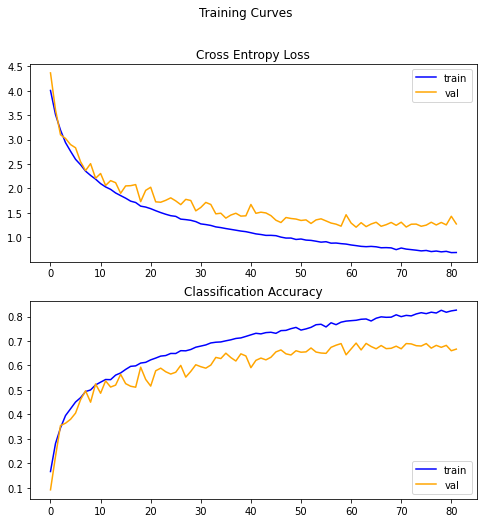


Test set evaluation metrics
---------------------------
Loss:     1.208
Accuracy: 69.792%


In [ ]:
_, accuracy = model_report(CNN1_MODEL_OPTIMIZED, CNN1_MODEL_OPTIMIZED_history)
accuracies_opt_Nadam["CNN1"] = accuracy

##### CNN2

In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True, optimizer = tf.optimizers.Nadam)
CNN2_MODEL_OPTIMIZED_history = train_model(CNN2_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)      

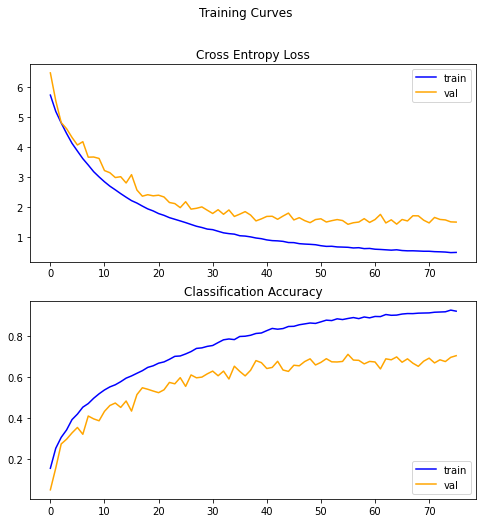


Test set evaluation metrics
---------------------------
Loss:     1.394
Accuracy: 70.139%


In [ ]:
_, accuracy = model_report(CNN2_MODEL_OPTIMIZED, CNN2_MODEL_OPTIMIZED_history)
accuracies_opt_Nadam["CNN2"] = accuracy

#### Μεταφορά μάθησης

##### VGG16

In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True, optimizer = tf.optimizers.Nadam)
VGG16_MODEL_OPTIMIZED_history = train_model(VGG16_MODEL_OPTIMIZED, epochs = 200, callbacks = [callback])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_11  (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 13s 40ms/step - loss: 2.4992 - accuracy: 0.2594 - val_loss: 1.1534 - val_accuracy: 0.6449
Epoch 2/200
266/266 [==============================] - 10s 39ms/step - loss: 1.1628 - accuracy

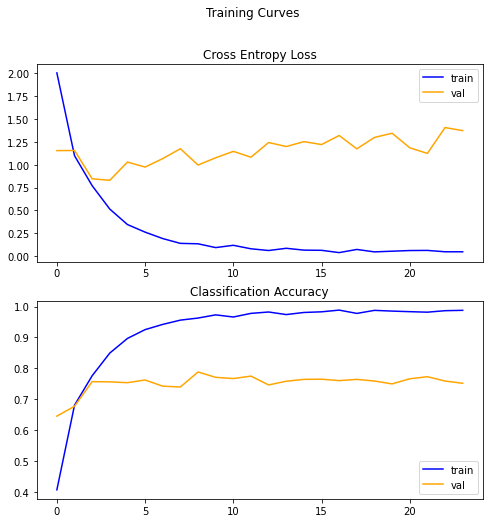


Test set evaluation metrics
---------------------------
Loss:     0.840
Accuracy: 75.942%


In [ ]:
_, accuracy = model_report(VGG16_MODEL_OPTIMIZED, VGG16_MODEL_OPTIMIZED_history)
accuracies_opt_Nadam["VGG_ALL"] = accuracy

##### MobileNet

In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True, optimizer = tf.optimizers.Nadam)
MobileNetV2_MODEL_OPTIMIZED_history = train_model(MobileNetV2_MODEL_OPTIMIZED, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks=[callback])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_12  (None, 1280)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 73s 235ms/step - loss: 1.7689 - accuracy: 0.4998 - val_loss: 2.2874 - val_accuracy: 0.3943
Epoch 2/200
266/266 [==============================] - 62s 233ms/step - loss: 0.3508 - acc

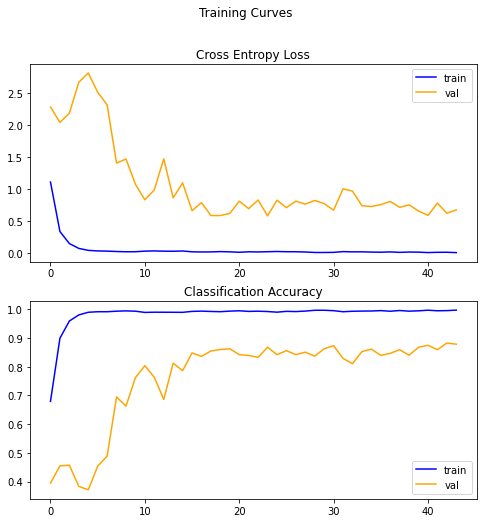


Test set evaluation metrics
---------------------------
Loss:     0.573
Accuracy: 86.210%


In [ ]:
_, accuracy = model_report(MobileNetV2_MODEL_OPTIMIZED, MobileNetV2_MODEL_OPTIMIZED_history, test_ds_res)
accuracies_opt_Nadam["MOBILENET_ALL"] = accuracy

##### DenseNet

In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True, optimizer = tf.optimizers.Nadam)
DENSENET_MODEL_OPTIMIZED_history = train_model(DENSENET_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_13  (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 44s 70ms/step - loss: 3.6886 - accuracy: 0.1368 - val_loss: 1.9870 - val_accuracy: 0.4894
Epoch 2/200
266/266 [==============================] - 17s 62ms/step - loss: 1.8614 - accur

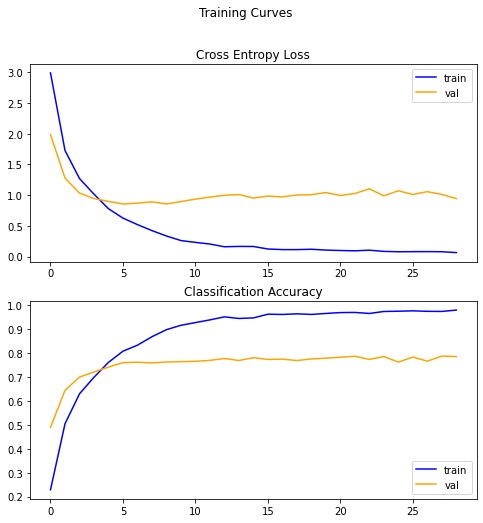


Test set evaluation metrics
---------------------------
Loss:     0.883
Accuracy: 75.347%


In [ ]:
_, accuracy = model_report(DENSENET_MODEL_OPTIMIZED, DENSENET_MODEL_OPTIMIZED_history)
accuracies_opt_Nadam["DENSENET_ALL"] = accuracy

### SGD

#### Δίκτυα "from scratch"

In [ ]:
accuracies_opt_SGD = {}

##### Simple CNN

In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True, optimizer = tf.optimizers.SGD)
SIMPLE_MODEL_OPTIMIZED_history = train_model(SIMPLE_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_10 (ReLU)              (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 13, 13, 64)      

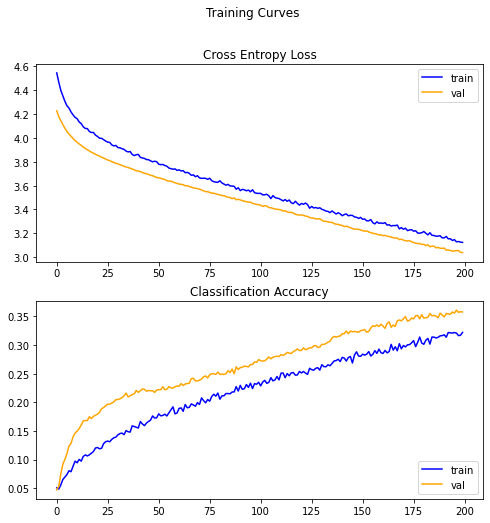


Test set evaluation metrics
---------------------------
Loss:     3.065
Accuracy: 34.524%


In [ ]:
_, accuracy = model_report(SIMPLE_MODEL_OPTIMIZED, SIMPLE_MODEL_OPTIMIZED_history)
accuracies_opt_SGD["SIMPLE_MODEL"] = accuracy

##### CNN1

In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True, optimizer = tf.optimizers.SGD)
CNN1_MODEL_OPTIMIZED_history = train_model(CNN1_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 13, 13, 64)      

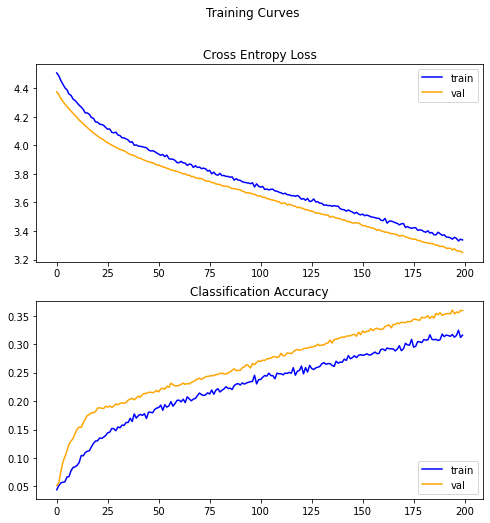


Test set evaluation metrics
---------------------------
Loss:     3.270
Accuracy: 35.069%


In [ ]:
_, accuracy = model_report(CNN1_MODEL_OPTIMIZED, CNN1_MODEL_OPTIMIZED_history)
accuracies_opt_SGD["CNN1"] = accuracy

##### CNN2

In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True, optimizer = tf.optimizers.SGD)
CNN2_MODEL_OPTIMIZED_history = train_model(CNN2_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_16 (ReLU)              (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 64)      

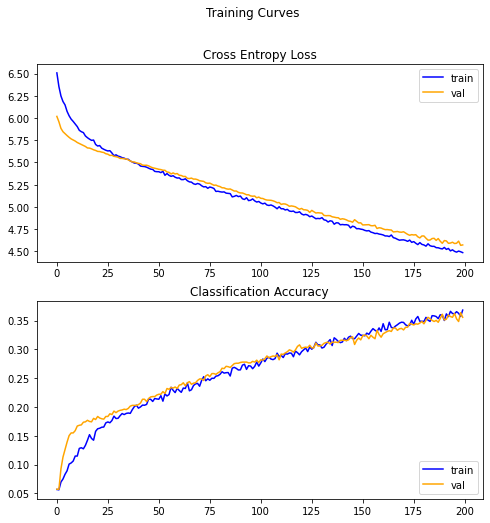


Test set evaluation metrics
---------------------------
Loss:     4.574
Accuracy: 34.871%


In [ ]:
_, accuracy = model_report(CNN2_MODEL_OPTIMIZED, CNN2_MODEL_OPTIMIZED_history)
accuracies_opt_SGD["CNN2"] = accuracy

#### Μεταφορά μάθησης

##### VGG16

In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True, optimizer = tf.optimizers.SGD)
VGG16_MODEL_OPTIMIZED_history = train_model(VGG16_MODEL_OPTIMIZED, epochs = 200, callbacks = [callback])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_38 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_14  (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 8s 29ms/step - loss: 3.4273 - accuracy: 0.0583 - val_loss: 2.8791 - val_accuracy: 0.1376
Epoch 2/200
266/266 [==============================] - 8s 29ms/step - loss: 2.9929 - accuracy: 

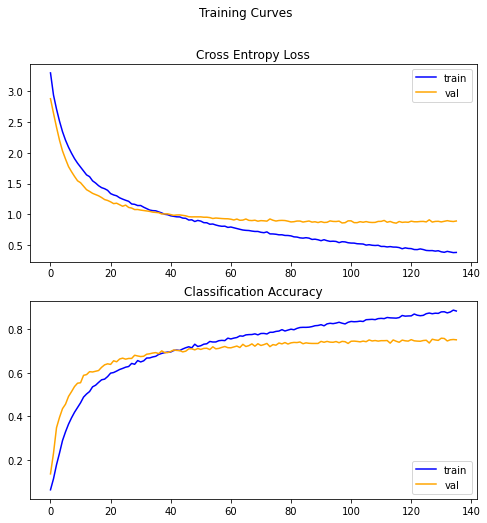


Test set evaluation metrics
---------------------------
Loss:     0.840
Accuracy: 75.248%


In [ ]:
_, accuracy = model_report(VGG16_MODEL_OPTIMIZED, VGG16_MODEL_OPTIMIZED_history)
accuracies_opt_SGD["VGG_ALL"] = accuracy

##### MobileNet

In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True, optimizer = tf.optimizers.SGD)
MobileNetV2_MODEL_OPTIMIZED_history = train_model(MobileNetV2_MODEL_OPTIMIZED, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 69s 222ms/step - loss: 3.3084 - accuracy: 0.0496 - val_loss: 3.3908 - val_accuracy: 0.0439
Epoch 2/200
266/266 [==============================] - 59s 222ms/step - loss: 3.0743 - accu

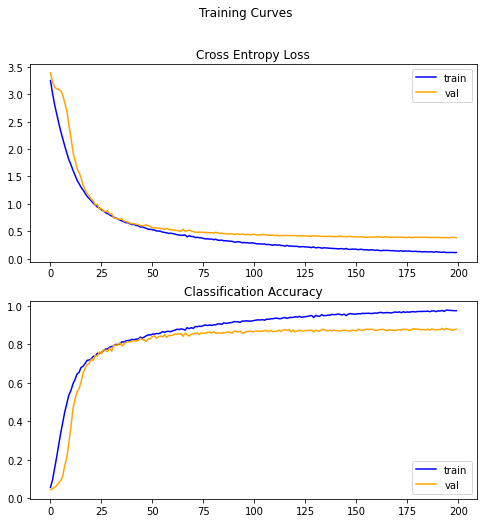


Test set evaluation metrics
---------------------------
Loss:     0.386
Accuracy: 87.946%


In [ ]:
_, accuracy = model_report(MobileNetV2_MODEL_OPTIMIZED, MobileNetV2_MODEL_OPTIMIZED_history, test_ds_res)
accuracies_opt_SGD["MOBILENET_ALL"] = accuracy

##### DenseNet

In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True, optimizer = tf.optimizers.SGD)
DENSENET_MODEL_OPTIMIZED_history = train_model(DENSENET_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 18s 35ms/step - loss: 4.7415 - accuracy: 0.0455 - val_loss: 3.2504 - val_accuracy: 0.0605
Epoch 2/200
266/266 [======

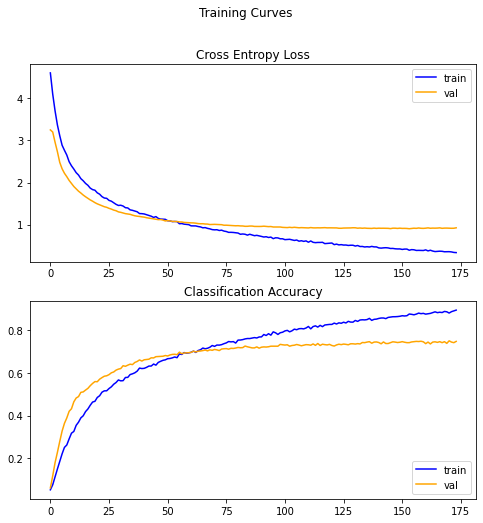


Test set evaluation metrics
---------------------------
Loss:     0.906
Accuracy: 74.554%


In [ ]:
_, accuracy = model_report(DENSENET_MODEL_OPTIMIZED, DENSENET_MODEL_OPTIMIZED_history)
accuracies_opt_SGD["DENSENET_ALL"] = accuracy

### RMSprop

#### Δίκτυα "from scratch"

In [ ]:
accuracies_opt_RMSprop = {}

##### Simple CNN

In [ ]:
SIMPLE_MODEL_OPTIMIZED = init_simple_model_optimized(summary = True, optimizer = tf.optimizers.RMSprop)
SIMPLE_MODEL_OPTIMIZED_history = train_model(SIMPLE_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        2

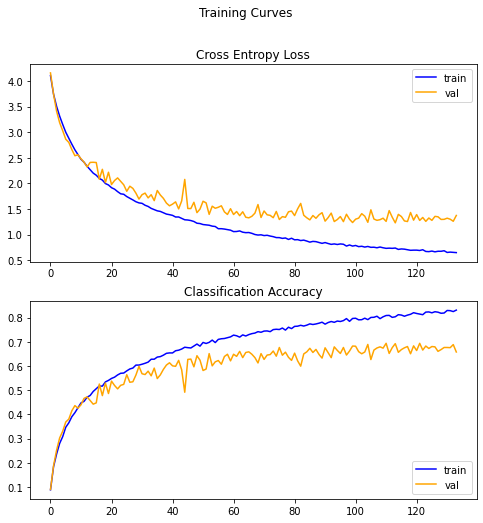


Test set evaluation metrics
---------------------------
Loss:     1.326
Accuracy: 67.262%


In [ ]:
_, accuracy = model_report(SIMPLE_MODEL_OPTIMIZED, SIMPLE_MODEL_OPTIMIZED_history)
accuracies_opt_RMSprop["SIMPLE_MODEL"] = accuracy

##### CNN1

In [ ]:
CNN1_MODEL_OPTIMIZED = init_cnn1_model_optimized(summary = True, optimizer = tf.optimizers.RMSprop)
CNN1_MODEL_OPTIMIZED_history = train_model(CNN1_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)       

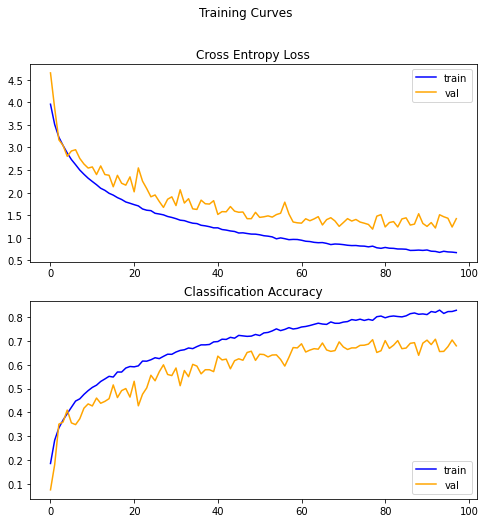


Test set evaluation metrics
---------------------------
Loss:     1.219
Accuracy: 68.849%


In [ ]:
_, accuracy = model_report(CNN1_MODEL_OPTIMIZED, CNN1_MODEL_OPTIMIZED_history)
accuracies_opt_RMSprop["CNN1"] = accuracy

##### CNN2

In [ ]:
CNN2_MODEL_OPTIMIZED = init_cnn2_model_optimized(summary = True, optimizer = tf.optimizers.RMSprop)
CNN2_MODEL_OPTIMIZED_history = train_model(CNN2_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)       

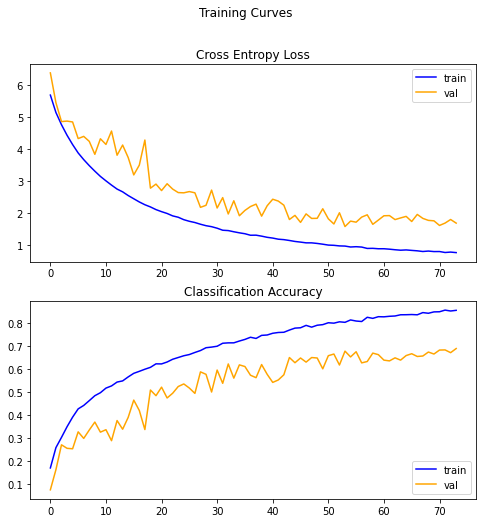


Test set evaluation metrics
---------------------------
Loss:     1.590
Accuracy: 67.510%


In [ ]:
_, accuracy = model_report(CNN2_MODEL_OPTIMIZED, CNN2_MODEL_OPTIMIZED_history)
accuracies_opt_RMSprop["CNN2"] = accuracy

#### Μεταφορά μάθησης

##### VGG16

In [ ]:
VGG16_MODEL_OPTIMIZED = init_VGG16_model_optimized(True, optimizer = tf.optimizers.RMSprop)
VGG16_MODEL_OPTIMIZED_history = train_model(VGG16_MODEL_OPTIMIZED, epochs = 200, callbacks = [callback])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                10260     
Total params: 14,724,948
Trainable params: 14,724,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 10s 34ms/step - loss: 2.9129 - accuracy: 0.1170 - val_loss: 1.7624 - val_accuracy: 0.4854
Epoch 2/200
266/266 [==============================] - 9s 33ms/step - loss: 1.7845 - accuracy: 

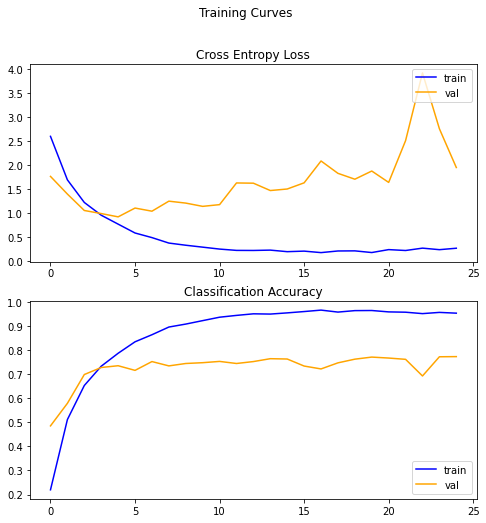


Test set evaluation metrics
---------------------------
Loss:     0.812
Accuracy: 76.637%


In [ ]:
_, accuracy = model_report(VGG16_MODEL_OPTIMIZED, VGG16_MODEL_OPTIMIZED_history)
accuracies_opt_RMSprop["VGG_ALL"] = accuracy

##### MobileNet

In [ ]:
MobileNetV2_MODEL_OPTIMIZED = init_MobileNetV2_model_optimized(True, optimizer = tf.optimizers.RMSprop)
MobileNetV2_MODEL_OPTIMIZED_history = train_model(MobileNetV2_MODEL_OPTIMIZED, train_dataset = train_ds_res, validation_dataset = validation_ds_res, epochs = 200, callbacks=[callback])

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                25620     
Total params: 2,283,604
Trainable params: 2,249,492
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 69s 229ms/step - loss: 1.6012 - accuracy: 0.5541 - val_loss: 2.4167 - val_accuracy: 0.4156
Epoch 2/200
266/266 [=======

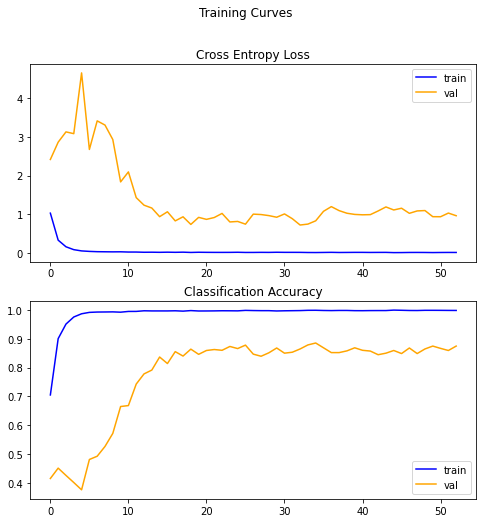


Test set evaluation metrics
---------------------------
Loss:     0.712
Accuracy: 87.798%


In [ ]:
_, accuracy = model_report(MobileNetV2_MODEL_OPTIMIZED, MobileNetV2_MODEL_OPTIMIZED_history, test_ds_res)
accuracies_opt_RMSprop["MOBILENET_ALL"] = accuracy

##### DenseNet

In [ ]:
DENSENET_MODEL_OPTIMIZED = init_DENSENET_model_optimized(True, optimizer = tf.optimizers.RMSprop)
DENSENET_MODEL_OPTIMIZED_history = train_model(DENSENET_MODEL_OPTIMIZED, epochs = 200, callbacks=[callback])

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                20500     
Total params: 7,058,004
Trainable params: 6,974,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/200
266/266 [==============================] - 33s 58ms/step - loss: 3.5491 - accuracy: 0.1582 - val_loss: 1.7876 - val_accuracy: 0.5286
Epoch 2/200
266/266 [======

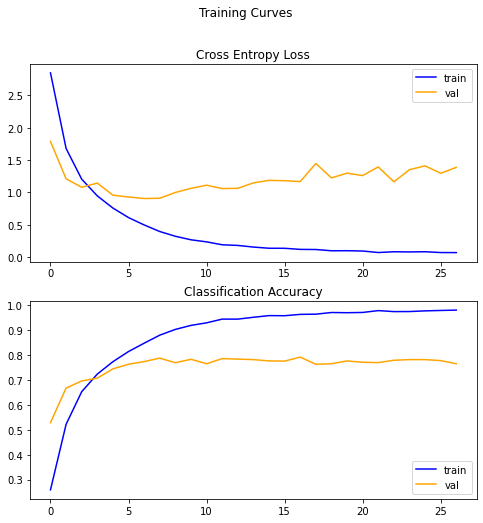


Test set evaluation metrics
---------------------------
Loss:     0.979
Accuracy: 76.141%


In [ ]:
_, accuracy = model_report(DENSENET_MODEL_OPTIMIZED, DENSENET_MODEL_OPTIMIZED_history)
accuracies_opt_RMSprop["DENSENET_ALL"] = accuracy

### Bar plots σύγκρισης

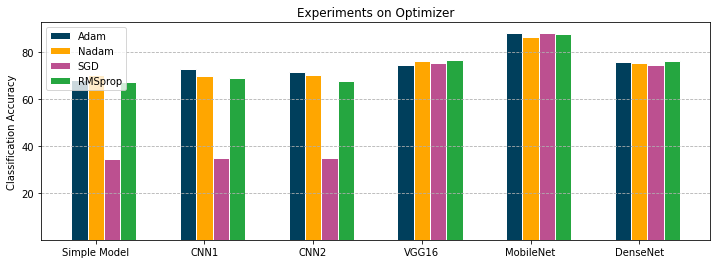

In [ ]:
# set width of bar
barWidth = 0.15
model_names = ['Simple Model', 'CNN1', 'CNN2', 'VGG16', 'MobileNet', 'DenseNet']

# set height of bars
bar1 = [accuracies_opt["SIMPLE_MODEL"],accuracies_opt["CNN1"],accuracies_opt["CNN2"],accuracies_opt["VGG_ALL"],accuracies_opt["MOBILENET_ALL"],accuracies_opt["DENSENET_ALL"]]
bar2 = [accuracies_opt_Nadam["SIMPLE_MODEL"],accuracies_opt_Nadam["CNN1"],accuracies_opt_Nadam["CNN2"],accuracies_opt_Nadam["VGG_ALL"],accuracies_opt_Nadam["MOBILENET_ALL"],accuracies_opt_Nadam["DENSENET_ALL"]]
bar3 = [accuracies_opt_SGD["SIMPLE_MODEL"],accuracies_opt_SGD["CNN1"],accuracies_opt_SGD["CNN2"],accuracies_opt_SGD["VGG_ALL"],accuracies_opt_SGD["MOBILENET_ALL"],accuracies_opt_SGD["DENSENET_ALL"]]
bar4 = [accuracies_opt_RMSprop["SIMPLE_MODEL"],accuracies_opt_RMSprop["CNN1"],accuracies_opt_RMSprop["CNN2"],accuracies_opt_RMSprop["VGG_ALL"],accuracies_opt_RMSprop["MOBILENET_ALL"],accuracies_opt_RMSprop["DENSENET_ALL"]]

# Set position of bar on X axis
r1 = np.arange(6)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.figure(figsize=(12,4))
plt.bar(r1, bar1, color='#003f5c', width=barWidth, edgecolor='white', label = 'Adam')
plt.bar(r2, bar2, color='#ffa600', width=barWidth, edgecolor='white', label = 'Nadam')
plt.bar(r3, bar3, color='#bc5090', width=barWidth, edgecolor='white', label = 'SGD')
plt.bar(r4, bar4, color='#25A640', width=barWidth, edgecolor='white', label = 'RMSprop')
plt.xticks([r + barWidth for r in range(6)], model_names)
plt.ylim(bottom=0.1)
plt.legend(loc='best')
plt.title("Experiments on Optimizer")
plt.ylabel("Classification Accuracy")
plt.grid(axis="y", linestyle="--")
plt.show()

Παρατηρούμε πως οι optimizers **Adam, Nadam και RMSprop παρουσιάζουν πολύ παρόμοια επίδοση** σε όλα τα μοντέλα. Από την άλλη, ο αλγόριθμος βελτιστοποίησης **SGD** φαίνεται πως **δεν αποδίδει καλά για τα from scratch δίκτυα**. Αυτό οφείλεται στο γεγονός ότι συγκλίνει με πολύ με πιο αργό ρυθμό από ότι οι υπόλοιποι τρεις, με αποτέλεσμα να χρειάζεται σημαντικά μεγαλύτερο αριθμό εποχών (περισσότερες από 200) για να μπορέσει να προσεγγίσει την ακρίβεια τους. Στα μοντέλα του Trasnfer learning και οι τέσσερις optimizers έχουν ανάλογη συμπεριφορά ως προς το test accuracy.